# DATA EXPLORATION AND ANALYSIS

## Subject:  
### Study of fatals interaction between law enforcement and citizen in USA.
  
The used dataset are based on WashingtonPostDatabase2, Fatal-police-agencies-data,  Fatal-police-shooting-data, PoliceDeaths,
#### Sources : Washington Post's database, Police Deaths. 
- Link
  - https://github.com/washingtonpost/data-police-shootings (Fatal-police-agencies-data,  Fatal-police-shooting-data)
  - https://github.com/fivethirtyeight/data/tree/master/police-deaths
 
#### Student:
  - Kamul Ali Nassoma Wattara
  - Sulaiman Fayyaz
  - Adjewoda Kutoati
######  Supinfo 2023-2024
     

## Roadmap  

+ Loading
+ Exploration
+ Cleaning
+ Analysis
  +  Analysis of Civilian Data in Fatal Shooting Dataset
    + Location of all Events on USA Map from 02-01-2015 to 26-03-2024
    + Statistical Analysis of the Fatal Shooting Dataset
      + Death Count of Fatal Encounter by State
      + Death Count of Fatal Encounter by County
      + Categorical and Quantitative Values Distribution
        + Age
        + Gender
        + T-test between Gender and Age
        + Race
        + ANOVA Test to Compare the Means of Age Across Different Race Groups
          + Verification of Normal Distribution
          + Evaluation
        + State With the Highest Number of Black Death
    + Shooting Involving People With Mental Disorders
      + Frequency of Shooting Involving Individuals With Mental disorders
      + Gender Repartition of Individuals With Mental Disorders
    + Cross-analysis Between Fleeing Status and Armed_with Variables Related to Individuals With a Mental Disorder
      + Contingency Table
      + Dependency Test
    + Visualisation of the Shooting Through Time
      + Fatal Police Shootings by Month
      + Most Fatal Month by Year for Police Shootings
      + Linear regression
      + Distribution of Deaths by Month in the Most Fatal Year
        
     
     
  + Analysis of Law Enforcement Data
    + law enforcers Deaths by Month (From 2007 Onwards)
    + Most Fatal Month by Year for Police Deaths
    + Distribution of Deaths by Month in the Worst Year for the law enforcers
    + Top 10 Most Involved Law Enforcers Departments in Shootings since 2015
    + Analysis of the law enforcers's Deaths starting from 2015
      + Total Death Count
      + Cause of Death
      + Total Death Count
      + Death Related to Interaction With Civilian
      + Total Death Count Based on Relevant Cause
    + 5 most dangerous States for law enforcers
    + 5 least dangerous State for law enforcers
    + Proportion of Law enforcer's Deaths Against Civilians from 2015 to 2016
    + Top Most Common First Names in Fatal Police Shootings





# Importing the Libraries 

To run this jupyter Notebook, the following dependencies must be installed.
- Python
- Pandas
- Numpy
- Matplotlib
- Seaborn
- Geopandas
- Wordcloud
- xlrd

In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

# Loading, Exploration and Cleaning

## WashingtonPostDatabase
### Brief description

In 2015, The Post began tracking details about each police-involved killing in the United States — the race of the deceased, the circumstances of the shooting, whether the person was armed and whether the person was experiencing a mental-health crisis — by manually culling local news reports, collecting information from law enforcement websites and social media, and monitoring independent databases such as Fatal Encounters and the now-defunct Killed by Police project. In many cases, The Post conducts additional reporting.

In 2022, The Post updated its database to standardize and publish the names of the police agencies involved in each shooting to better measure accountability at the department level.

#### In this study we 'll use the washingtonPostDatabase V2 as it is more completed and maintained up to date.
#### Data about each fatal shooting is provided via two comma-separated value

+ Death Record data for each victim and incident is included in /v2/fatal-police-shootings-data.csv
+ Data for police agencies involved in at least one fatal police shooting since 2015 is included /v2/fatal-police-shootings-agencies.csv

  

## Loading

### Fatal police shooting  agencies database

In [235]:
from IPython.display import display_png
police_agencies_df = pd.read_csv("fatal-police-shootings-agencies.csv")
police_agencies_df.head(2)

,id,name,type,state,oricodes,total_shootings
0,3145,Abbeville County Sheriff's Office,sheriff,SC,SC00100,1
1,2576,Aberdeen Police Department,local_police,WA,WA01401,1


### Fatal police shooting database

In [232]:
civil_df = pd.read_csv("fatal-police-shootings-data.csv")
civil_df.head(2)

,id,date,threat_type,flee_status,armed_with,city,county,state,latitude,longitude,location_precision,name,age,gender,race,race_source,was_mental_illness_related,body_camera,agency_ids
0,3,2015-01-02,point,not,gun,Shelton,Mason,WA,47.246826,-123.121592,not_available,Tim Elliot,53.0,male,A,not_available,True,False,73
1,4,2015-01-02,point,not,gun,Aloha,Washington,OR,45.487421,-122.891696,not_available,Lewis Lee Lembke,47.0,male,W,not_available,False,False,70


### Police death database

In [119]:
police_death_df = pd.read_csv("PoliceDeaths.csv")
police_death_df.head(2)

,person,dept,eow,cause,cause_short,date,year,canine,dept_name,state
0,Constable Darius Quimby,"Albany County Constable's Office, NY","EOW: Monday, January 3, 1791",Cause of Death: Gunfire,Gunfire,1791-01-03,1791,False,Albany County Constable's Office,NY
1,Sheriff Cornelius Hogeboom,"Columbia County Sheriff's Office, NY","EOW: Saturday, October 22, 1791",Cause of Death: Gunfire,Gunfire,1791-10-22,1791,False,Columbia County Sheriff's Office,NY


## Exploration

### Exploration of fatal-police-shootings-agencies

In [120]:

police_agencies_df.head(1)

,id,name,type,state,oricodes,total_shootings
0,3145,Abbeville County Sheriff's Office,sheriff,SC,SC00100,1


#### Shape

In [121]:
police_agencies_df.shape

(3521, 6)

- We have :
  - 3521 observations
  - 6 variables or characteristics

#### Verification of Data type

In [122]:
def get_numerical_cols(x):
    cols = []
    categorical_type = "object"
    date_type = ["<M8[ns]","datetime","datetime64"]
    for col in x.columns:
        if x[col].dtype != "bool" and x[col].dtype !=categorical_type and  x[col].dtype not in date_type  :
            cols.append(col)
    return cols

def get_categorical_cols(x):
    cols = []
    categorical_type = ["object"]
    
    for col in x.columns:
        if x[col].dtype != "bool" and x[col].dtype  in categorical_type:
            cols.append(col)
    return cols
def get_boolean_cols(x):
    cols = []
    bool_type = "bool"
    
    for col in x.columns:
        if x[col].dtype  == bool_type:
            cols.append(col)
    return cols
def get_time_cols(x):
    cols = []
    date_type = ["<M8[ns]","datetime","datetime64"]
    
    for col in x.columns:
        if x[col].dtype  in date_type:
            cols.append(col)
    return cols
    

In [123]:
numerical_cols =  get_numerical_cols(police_agencies_df)
categorical_cols = get_categorical_cols(police_agencies_df)
boolean_cols = get_boolean_cols(police_agencies_df)
date_cols = get_time_cols(police_agencies_df)
print("\nnumerical columns:", numerical_cols,"\ncount: ",len(numerical_cols))
print("\ncategorical columns:", categorical_cols, "\ncount: ", len(categorical_cols))
print("\nboolean columns:", boolean_cols, "\ncount: ",len(boolean_cols))
print("\ndate columns:", date_cols, "\ncount: ",len(date_cols))


numerical columns: ['id', 'total_shootings'] 
count:  2

categorical columns: ['name', 'type', 'state', 'oricodes'] 
count:  4

boolean columns: [] 
count:  0

date columns: [] 
count:  0


- Column data type and column content are aligned

#### Looking for duplicate

In [124]:
duplicate_values_df= police_agencies_df[ police_agencies_df.duplicated()]
print("Duplicate row do not exist") if duplicate_values_df.empty else print(" Duplicate row exist")

Duplicate row do not exist


+ There is no duplicated row

#### Looking for NaN values

In [125]:
police_agencies_df.isna().sum()

id                   0
name                 0
type                 0
state                0
oricodes           125
total_shootings      0
dtype: int64

- Oricodes contains NaN values

##### Conclusion
The dataset look great, but we need 'll change the name of the column type to a more distinguishable name

### Exploration of fatal-police-shootings-data

In [126]:

civil_df.head(1)

,id,date,threat_type,flee_status,armed_with,city,county,state,latitude,longitude,location_precision,name,age,gender,race,race_source,was_mental_illness_related,body_camera,agency_ids
0,3,2015-01-02,point,not,gun,Shelton,Mason,WA,47.246826,-123.121592,not_available,Tim Elliot,53.0,male,A,not_available,True,False,73


#### Shape

In [127]:
civil_df.shape

(9497, 19)

- We have :
  - 9497 observations
  - 19 variables or characteristics

#### Verification of Data type

In [128]:
numerical_cols =  get_numerical_cols(civil_df)
categorical_cols = get_categorical_cols(civil_df)
boolean_cols = get_boolean_cols(civil_df)
date_cols = get_time_cols(civil_df)
print("\nnumerical columns:", numerical_cols,"\ncount: ",len(numerical_cols))
print("\ncategorical columns:", categorical_cols, "\ncount: ", len(categorical_cols))
print("\nboolean columns:", boolean_cols, "\ncount: ",len(boolean_cols))
print("\ndate columns:", date_cols, "\ncount: ",len(date_cols))


numerical columns: ['id', 'latitude', 'longitude', 'age'] 
count:  4

categorical columns: ['date', 'threat_type', 'flee_status', 'armed_with', 'city', 'county', 'state', 'location_precision', 'name', 'gender', 'race', 'race_source', 'agency_ids'] 
count:  13

boolean columns: ['was_mental_illness_related', 'body_camera'] 
count:  2

date columns: [] 
count:  0


++ In categorical colummns, we can see that we have date as object. We 'll correct this during the cleaning process 

#### Looking for duplicate

In [129]:
duplicate_values_df= civil_df[ civil_df.duplicated()]
print("Duplicate row do not exist") if duplicate_values_df.empty else print(" Duplicate row exist")

Duplicate row do not exist


+ There is no duplicated row

#### Looking for NaN values

In [130]:
civil_df.isna().sum()

id                               0
date                             0
threat_type                     67
flee_status                   1298
armed_with                     212
city                            70
county                        4722
state                            0
latitude                      1051
longitude                     1051
location_precision            1051
name                           345
age                            387
gender                          27
race                          1125
race_source                   1098
was_mental_illness_related       0
body_camera                      0
agency_ids                       0
dtype: int64

- We have several NaN values, their imputation will depend on the type of study

##### Conclusion 
We need to change the data type of date column and we have to deal with the NaN values

### Exploration of Police death data


###### police_death_df

In [131]:

police_death_df.head(1)

,person,dept,eow,cause,cause_short,date,year,canine,dept_name,state
0,Constable Darius Quimby,"Albany County Constable's Office, NY","EOW: Monday, January 3, 1791",Cause of Death: Gunfire,Gunfire,1791-01-03,1791,False,Albany County Constable's Office,NY


#### Shape

In [132]:
police_death_df.shape

(22800, 10)

- We have :
  - 22800 observations
  - 10 variables or characteristics

#### Verification of Data type

In [133]:
numerical_cols =  get_numerical_cols(police_death_df)
categorical_cols = get_categorical_cols(police_death_df)
boolean_cols = get_boolean_cols(police_death_df)
date_cols = get_time_cols(police_death_df)
print("\nnumerical columns:", numerical_cols,"\ncount: ",len(numerical_cols))
print("\ncategorical columns:", categorical_cols, "\ncount: ", len(categorical_cols))
print("\nboolean columns:", boolean_cols, "\ncount: ",len(boolean_cols))
print("\ndate columns:", date_cols, "\ncount: ",len(date_cols))


numerical columns: ['year'] 
count:  1

categorical columns: ['person', 'dept', 'eow', 'cause', 'cause_short', 'date', 'dept_name', 'state'] 
count:  8

boolean columns: ['canine'] 
count:  1

date columns: [] 
count:  0


 +++ In categorical colummns, we can see that we have date as object. We 'll correct this during the cleaning process 

#### Looking for duplicate

In [134]:
duplicate_values_df= police_death_df[ police_death_df.duplicated()]
print("Duplicate row do not exist") if duplicate_values_df.empty else print(" Duplicate row exist")

Duplicate row do not exist


+ There is no duplicated row

#### Looking for NaN values

In [135]:
police_death_df.isna().sum()

person         0
dept           0
eow            0
cause          0
cause_short    0
date           0
year           0
canine         0
dept_name      0
state          0
dtype: int64

- We have 0 NaN values, their imputation will depend on the type of study

##### Conclusion 
We need to change the data type of date column 

## Cleanning

### Fatal police agencies data

previously we had discover that:
- The column type is not human interpretable so we ll change it to department_type


#### Change of the column with name "type"

In [136]:
police_agencies_df.rename(columns={"type":"department_type"}, inplace=True)
police_agencies_df.head(2)


,id,name,department_type,state,oricodes,total_shootings
0,3145,Abbeville County Sheriff's Office,sheriff,SC,SC00100,1
1,2576,Aberdeen Police Department,local_police,WA,WA01401,1


+ As the data type are coherent with the values expected, there is nothing more to do to normalize them
  

#### Removal of NaN

In [137]:
df_shape = police_agencies_df.shape
# Get the 5% ratio number as the threshold for listwise deletion
ratio =  df_shape[0]*5/100
print("\nshape: ", df_shape,"\n\n5% of police agencies data : ",ratio)


shape:  (3521, 6) 

5% of police agencies data :  176.05


+ According to general usage we can do a list wise deletion
+ We have only 125 NaN values inside oricodes column

In [138]:
police_agencies_df.dropna(inplace=True)

####  Checking the values in categorical columns

In [139]:
categorical = get_categorical_cols(police_agencies_df)
for col in categorical:
   
    print("\n######################################")
    print("###",col,"values distribution ##")
    print("######################################")
    try:
        print(police_agencies_df[col].value_counts())
    except:
        print("\n\n ****Alert****")
        print("\n",col,"column contains multiple values\n")


######################################
### name values distribution ##
######################################
name
U.S. Marshals Service                    40
Federal Bureau of Investigation          21
Washington County Sheriff's Office       10
Jefferson County Sheriff's Department     8
Polk County Sheriff's Office              7
                                         ..
Gooding Police Department                 1
Goodwell Police Department                1
Goodyear Police Department                1
Gordon County Sheriff's Office            1
Zion Police Department                    1
Name: count, Length: 2891, dtype: int64

######################################
### department_type values distribution ##
######################################
department_type
local_police    2100
sheriff         1103
federal           75
state_police      59
local_other       36
other             12
state_other       11
Name: count, dtype: int64

######################################
### state

Note: The oricode information are showned only the first, after removal of this column, it ll no longer appear as the removal is done with reference to original data set 

######
+ Oricodes column contains several values.
  #### Conclusion: this dataframe is not a tidy dataset
  ######
+ Information relevant to Oricodes needed to decide which action must be taken.
  ######
  Oricodes is Department ORI codes (federal identifiers). The metadata give us those additionnal information :
  "Note that there can be multiple ORI codes for a single department due to aggregated sub-departments and/or differing values provided by the FBI vs DOJ."

  #### Conclusion: they are aggregated sub-departement, those values can represent the same information or not based on different source. We don't have any way to distinguish the duplicated values among them and their interest is not relevant to our study thus we 'll drop this column 
  

In [140]:
police_agencies_df.drop(columns="oricodes", inplace=True)
police_agencies_df.head(2)

,id,name,department_type,state,total_shootings
0,3145,Abbeville County Sheriff's Office,sheriff,SC,1
1,2576,Aberdeen Police Department,local_police,WA,1


### Fatal police shooting data

Previously we had discover in civil_df that:
- The date column is of wrong type, we need to convert it to datetime
- Next we 'll look into the categorical values to check if there is several values in same column

#### Change the date type from "object" to "datetime"

In [141]:
civil_df.date =pd.to_datetime( civil_df.date)

Verification

In [142]:
numerical_cols =  get_numerical_cols(civil_df)
categorical_cols = get_categorical_cols(civil_df)
boolean_cols = get_boolean_cols(civil_df)
date_cols = get_time_cols(civil_df)
print("\nnumerical columns:", numerical_cols,"\ncount: ",len(numerical_cols))
print("\ncategorical columns:", categorical_cols, "\ncount: ", len(categorical_cols))
print("\nboolean columns:", boolean_cols, "\ncount: ",len(boolean_cols))
print("\ndate columns:", date_cols, "\ncount: ",len(date_cols))


numerical columns: ['id', 'latitude', 'longitude', 'age'] 
count:  4

categorical columns: ['threat_type', 'flee_status', 'armed_with', 'city', 'county', 'state', 'location_precision', 'name', 'gender', 'race', 'race_source', 'agency_ids'] 
count:  12

boolean columns: ['was_mental_illness_related', 'body_camera'] 
count:  2

date columns: ['date'] 
count:  1


####  Checking the values in categorical columns

In [143]:
categorical = get_categorical_cols(civil_df)
for col in categorical:
    print("\n######################################")
    print("###",col,"values distribution ##")
    print("######################################")
    try:
        print(civil_df[col].value_counts())
    except:
        print("\n\n ****Alert****")
        print("\n",col,"column contains multiple values\n")


######################################
### threat_type values distribution ##
######################################
threat_type
shoot           2673
threat          2553
point           1757
attack          1370
move             475
undetermined     375
flee             174
accident          53
Name: count, dtype: int64

######################################
### flee_status values distribution ##
######################################
flee_status
not      5102
car      1501
foot     1245
other     351
Name: count, dtype: int64

######################################
### armed_with values distribution ##
######################################
armed_with
gun                          5523
knife                        1605
unarmed                       539
undetermined                  397
vehicle                       333
replica                       306
blunt_object                  230
unknown                       141
other                          94
gun;vehicle                   

We can see that armed_with has multiple values in a single column, if needed w'll split this column and stack them and store it in a new dataframe.

In [144]:

# new_civil_df = pd.DataFrame(civil_df.armed_with.str.split(';')., index=civil_df.id).stack()tolist()
# new_civil_df = new_df.reset_index([0, 'id'])
# new_civil_df.columns = civil_df.columns
# new_civil_df.head()

#### Nan

We ll keep the NaN values and impute them based on select columns for our analysis

### Police death data

Previously we had discover in civil_df that:
- The date column is of wrong type, we need to convert it to datetime
- Next we 'll look into the categorical values to check if there is several values in same column

#### Change the date type from "object" to "datetime"

In [145]:
police_death_df.date =pd.to_datetime( police_death_df.date)

Verification

In [146]:
numerical_cols =  get_numerical_cols(police_death_df)
categorical_cols = get_categorical_cols(police_death_df)
boolean_cols = get_boolean_cols(police_death_df)
date_cols = get_time_cols(police_death_df)
print("\nnumerical columns:", numerical_cols,"\ncount: ",len(numerical_cols))
print("\ncategorical columns:", categorical_cols, "\ncount: ", len(categorical_cols))
print("\nboolean columns:", boolean_cols, "\ncount: ",len(boolean_cols))
print("\ndate columns:", date_cols, "\ncount: ",len(date_cols))


numerical columns: ['year'] 
count:  1

categorical columns: ['person', 'dept', 'eow', 'cause', 'cause_short', 'dept_name', 'state'] 
count:  7

boolean columns: ['canine'] 
count:  1

date columns: ['date'] 
count:  1


####  Checking the values in categorical columns

In [147]:
categorical = get_categorical_cols(police_death_df)
for col in categorical:
    print("\n######################################")
    print("###",col,"values distribution ##")
    print("######################################")
    try:
        print(police_death_df[col].value_counts())
    except:
        print("\n\n ****Alert****")
        print("\n",col,"column contains multiple values\n")


######################################
### person values distribution ##
######################################
person
K9 Rocky                                4
K9 King                                 3
K9 Bruno                                3
K9 Sarge                                3
K9 Roscoe                               3
                                       ..
Game Warden Harvey M. Carter            1
Detective Sergeant John F. Mickley      1
Deputy Game Warden John W. Hollowell    1
Deputy Game Warden Joseph Saunders      1
K9 Credo                                1
Name: count, Length: 22742, dtype: int64

######################################
### dept values distribution ##
######################################
dept
New York City Police Department, NY                                         753
Chicago Police Department, IL                                               492
Puerto Rico Police Department, PR                                           338
United States Departm

The police death dataframe is a tidy dataset

# Analysis

In the following section, we 'll compute the NaN values case by case.

## Analysis of Civilians Data in Fatal Shooting Dataset

### Location of All Events on USA Map from 02-01-2015 to 26-03-2024

+ To display a world map representing the location of all fatal encounter, we need the longitude and latitude to be not null, this is why we are going to delete all NaN values for these two columns, moreover we have enough data to afford this computation.

#### Removal of NaN values in "Latitude"and "Longitude" and visualisation of the coordinates on map

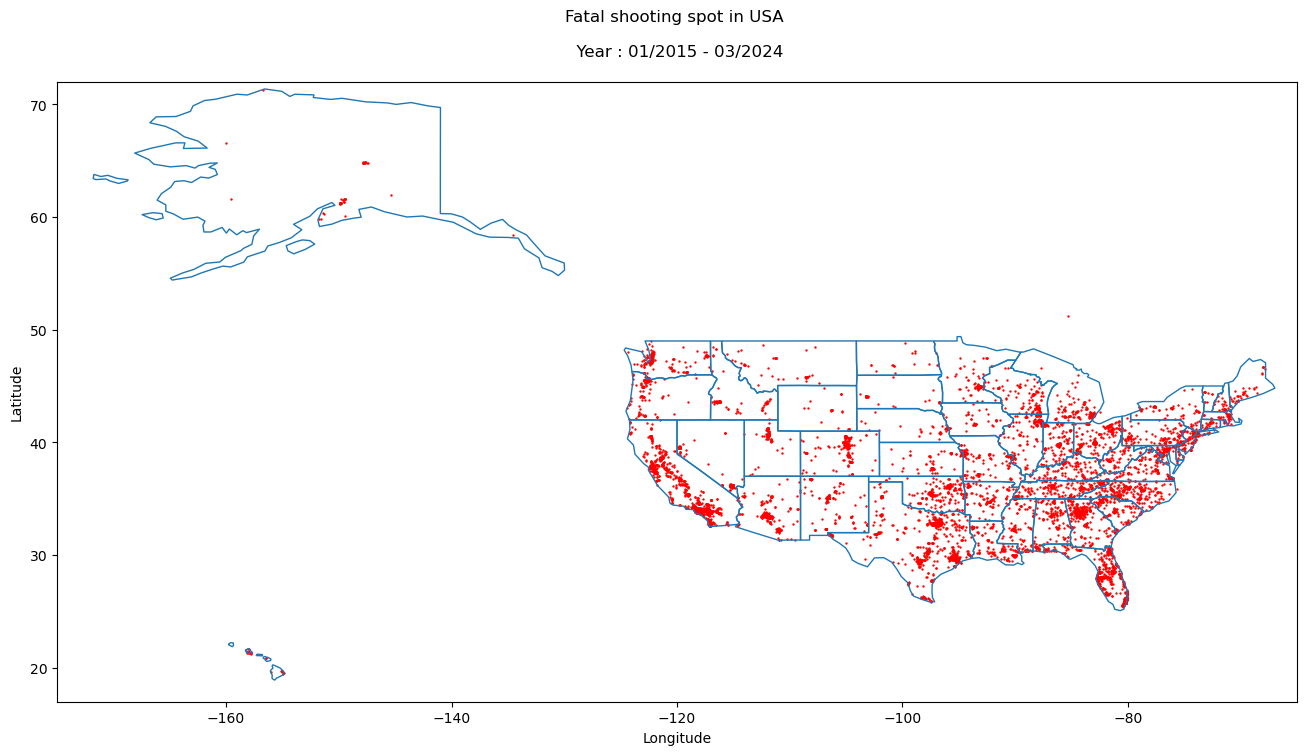

In [148]:

geo_data=civil_df.dropna(subset=["latitude","longitude"])

geometry = [Point(xy) for xy in zip (geo_data['longitude'], geo_data['latitude'])]

gdf = gpd.GeoDataFrame(geo_data, geometry=geometry)

# Read world shape file
world = gpd.gpd.read_file("../EDAP/110m_cultural/ne_110m_admin_1_states_provinces.shp")

# # Plotting

# Create figures
fig, ax = plt.subplots(figsize=(16, 10))
world.boundary.plot(ax=ax, linewidth=1)

gdf.plot(ax=ax, markersize=0.5, color="red")


# # Creating axis limits and title
plt.xlim([-175, -65])
plt.ylim([17, 72])

plt.title("Fatal shooting spot in USA \n\n  Year : 01/2015 - 03/2024 \n")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()



###### Conclusion: All USA State are involved in police fatal shooting

### Statistical Analysis of Fatal Shooting Dataset

#### Death Count of Fatal Encouter by State

In [149]:
fedf = civil_df.drop(columns= ["latitude","longitude"]) # fedf = fatal encounter data frame
# Check of NaN values in state column
print("\n NaN count in state column: ",
fedf.state.isna().sum())



 NaN count in state column:  0



+ We ll group State by name count 

To get the total of row associated to State, we need to impute All NaN values in name column

In [150]:
fedf.name.isna().sum()

345

There are 345 NaN values, We ll set those values to "unknown"

In [151]:
fedf.fillna(value={"name":"unknown"}, inplace=True)
print("Verification: \n--> Remaining NaN: ",
fedf.name.isna().sum())

Verification: 
--> Remaining NaN:  0


In [152]:
name_count_state = fedf.groupby(["state"])["name"].count().reset_index()
name_count_state.rename(columns={"name":"name_count"}, inplace=True)
print("\n  Frequencies of fatal shootings in USA  State")
print("\n  Ten first values \n ")
print(name_count_state.sort_values(by="name_count",ascending=False, ignore_index=True).head(10))



  Frequencies of fatal shootings in USA  State

  Ten first values 
 
  state  name_count
0    CA        1319
1    TX         895
2    FL         608
3    AZ         426
4    GA         358
5    CO         342
6    NC         276
7    TN         266
8    OH         266
9    WA         255


In [153]:
print("\nStatistics on State Name Count :\n",name_count_state.name_count.describe())




Statistics on State Name Count :
 count      51.000000
mean      186.215686
std       225.212994
min         8.000000
25%        58.000000
50%       150.000000
75%       202.500000
max      1319.000000
Name: name_count, dtype: float64


+ Interpretation :
  + Number total of state : 51
  + average of death by state : 186.21
  + Standard deviation around the mean:  225,21
  + Range of the death count
     + min 8
     + max 1319 

- Identification of the State with least death count and max death count

In [154]:
least_death_state = name_count_state[name_count_state["name_count"]==8]
print("\n State with the least death :",least_death_state["state"][39])
most_death_state = name_count_state[name_count_state["name_count"]==1319]
print(" State with the most death :", most_death_state.state[4])


 State with the least death : RI
 State with the most death : CA


+ Visualisation

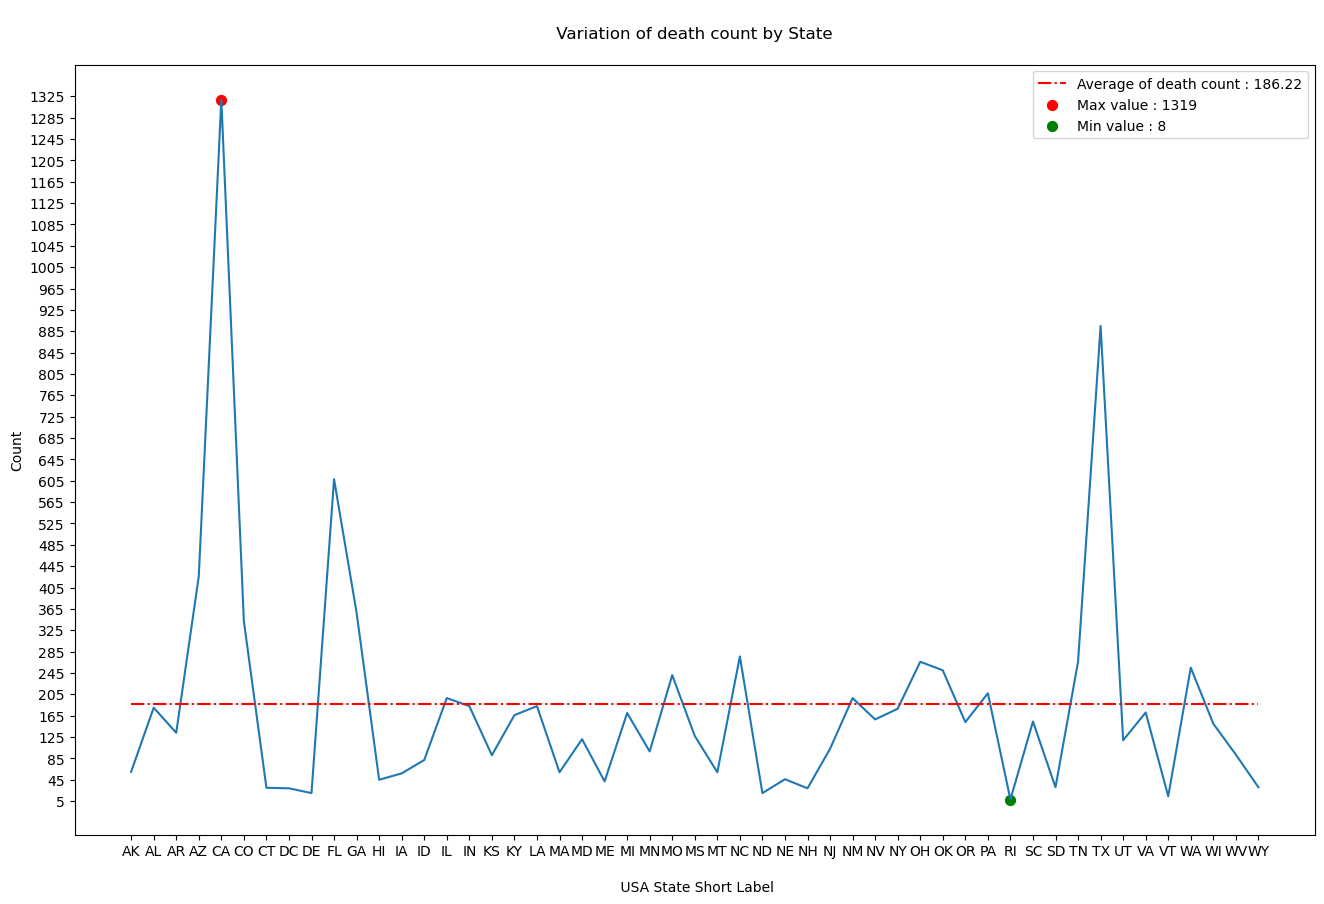

<Figure size 640x480 with 0 Axes>

In [236]:
# plot
fig, ax = plt.subplots(figsize=(16, 10))

max_value =name_count_state.name_count.idxmax()
min_value =name_count_state.name_count.idxmin()
plt.plot(name_count_state.state, name_count_state.name_count)
plt.hlines(np.mean(name_count_state.name_count), xmin=0, xmax=name_count_state.index[-1],label=f"Average of death count : {np.round(np.mean(name_count_state.name_count),2) }",linestyles="dashdot", colors="red")
plt.scatter(max_value, name_count_state.loc[max_value,"name_count"], color="red", label=f"Max value : {name_count_state.name_count[max_value]}" ,s=50)
plt.scatter(min_value, name_count_state.loc[min_value,"name_count"], color="green", label=f"Min value : {name_count_state.name_count[min_value]}" ,s=50)
plt.xlabel("\n USA State Short Label")
plt.ylabel("Count")
plt.title(" \n Variation of death count by State \n")
plt.yticks(np.arange(5, 1330, step=40))
plt.legend()
plt.show()
plt.savefig("variation_death_state")

#### Death Count of Fatal Encouter by County

In [156]:

# Check of NaN values in County column
fedf_nan= fedf.county.isna().sum()
print("\n NaN count in County column: ",
fedf_nan)



 NaN count in County column:  4722


+ There is 4722 NaN values in the County column, we have to manage them before doing any operation



In [157]:
# Evaluation of the ratio of the NaN values
total_row = fedf.county.shape[0]
ratio = fedf_nan/total_row
print("% of NaN in County columns : ", ratio*100)

% of NaN in County columns :  49.72096451511003


###### In this case almost half of the County row is NaN, therefore deleting those rows will compromise our data as we 'll lose important data.
###### Action:
+ As we can't guess not known county name, we 'll fill those values by "Not assigned" values 

In [158]:
fedf.county.fillna(value="Not_Assigned", inplace=True)

#Verification
fedf_nan= fedf.county.isna().sum()
print("County NaN values : ",fedf_nan)



County NaN values :  0


+ Let's regroup name based on County

In [159]:
name_count_county = fedf.groupby(["county"])["name"].count().reset_index()
name_count_county.rename(columns={"name":"name_count"}, inplace=True)
print("\n  Frequencies of fatal shootings in USA  County")
print("\n  Ten first values \n ")
print(name_count_county.sort_values(by="name_count", ascending=False, ignore_index=True).head(10))



  Frequencies of fatal shootings in USA  County

  Ten first values 
 
           county  name_count
0    Not_Assigned        4722
1     Los Angeles         195
2        Maricopa         126
3          Harris          74
4  San Bernardino          65
5       Jefferson          64
6          Orange          62
7      Washington          60
8           Clark          60
9       Riverside          53



+ Descriptive Statistics 

In [160]:
print("\n Statistics on County Name Count : \n",name_count_county.name_count.describe())




 Statistics on County Name Count : 
 count     912.000000
mean       10.413377
std       156.587158
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max      4722.000000
Name: name_count, dtype: float64


+ Interpretation :
  + Number total of County : 911 + 1 (Not assigned) = 912
  + average of death by state : 10.41
  + Standard deviation around the mean:  156.58
  + Range of the death count
     + min 1
     + max 4722 

+ We can see that the maximum death count is 4722 which is exactly the previous County NaN number, to evaluate the actual known County with maximum death count, we should get the value directly this "Not assigned" County value name
  

In [161]:
# Delete the row with County name equal to "Not assigned"
relevant_county_mdc = name_count_county.name_count.nlargest(2) # mdc = max death count
print(relevant_county_mdc)

590    4722
472     195
Name: name_count, dtype: int64


+ The real max death count with a known county name is the County with index 472 

In [162]:
name_count_county.iloc[472]

county        Los Angeles
name_count            195
Name: 472, dtype: object

+ State with minimum death count
  

In [163]:
least_death_state = name_count_county[name_count_county["name_count"]==1]

# Read index of least_death_state from the query
print(least_death_state)
print("\n Total \n",least_death_state.count())




        county  name_count
5       Aitkin           1
9      Alamosa           1
11   Albemarle           1
12     Allegan           1
13    Allegany           1
..         ...         ...
892    Winkler           1
899      Worth           1
900     Wright           1
907       Yolo           1
909      Young           1

[342 rows x 2 columns]

 Total 
 county        342
name_count    342
dtype: int64


- There are 342 county where the number of death is equal to 1 during the past year

###### Visualisation

- There are too much county so we can't use an histogram for visualisation, here we can use a worldcloud

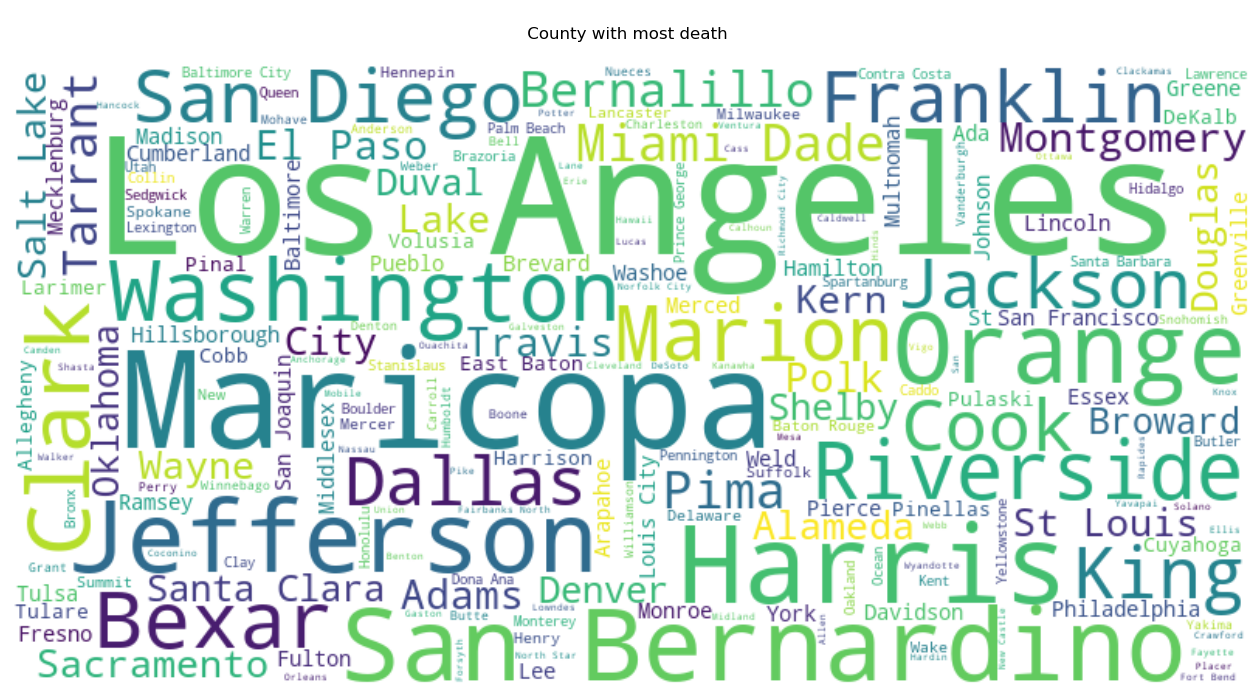

In [164]:
# plot
fig, ax = plt.subplots(figsize=(16, 10))

# Get the county name
clean_names = fedf[fedf['county'] != "Not_Assigned"]
clean_names.county.value_counts()
# # Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(clean_names.county.to_string())

plt.imshow(wordcloud, interpolation='bilinear')
plt.title("\n County with most death  \n")
plt.axis('off')
plt.show()

####  Categorical and Quantitative Values Distribution

##### Age


In [165]:
print("\nBefore imputation ")
fedf.age.isna().sum()
print("Age NaN values count",fedf.age.isna().sum())
clean_age_df = fedf.dropna( subset=["age"])

print("\nAfter imputation ")
print("Verification: \n--> Remaining NaN: ",
clean_age_df.age.isna().sum())


Before imputation 
Age NaN values count 387

After imputation 
Verification: 
--> Remaining NaN:  0


###### Experance

In [166]:
clean_age_df.age.describe()

count    9110.00000
mean       37.42371
std        12.93761
min         2.00000
25%        28.00000
50%        35.00000
75%        45.00000
max        92.00000
Name: age, dtype: float64

- The population average Age is 37 y
- 25 % are under 28y
- 50 % are under 35y
- 75 % are under 45y

###### IQR

In [167]:
# Assuming df is your DataFrame and 'Age' is the column of interest
Q1 = clean_age_df['age'].quantile(0.25)
Q3 = clean_age_df['age'].quantile(0.75)

# Calculating IQR
IQR = Q3 - Q1

print("Interquartile Range (IQR) for Age column:", IQR)


Interquartile Range (IQR) for Age column: 17.0


The Interquartile Range (IQR) is a measure of statistical dispersion that describes the spread of data in the dataset. It is calculated as the difference between the third quartile (Q3) and the first quartile (Q1).

###### Visualisation

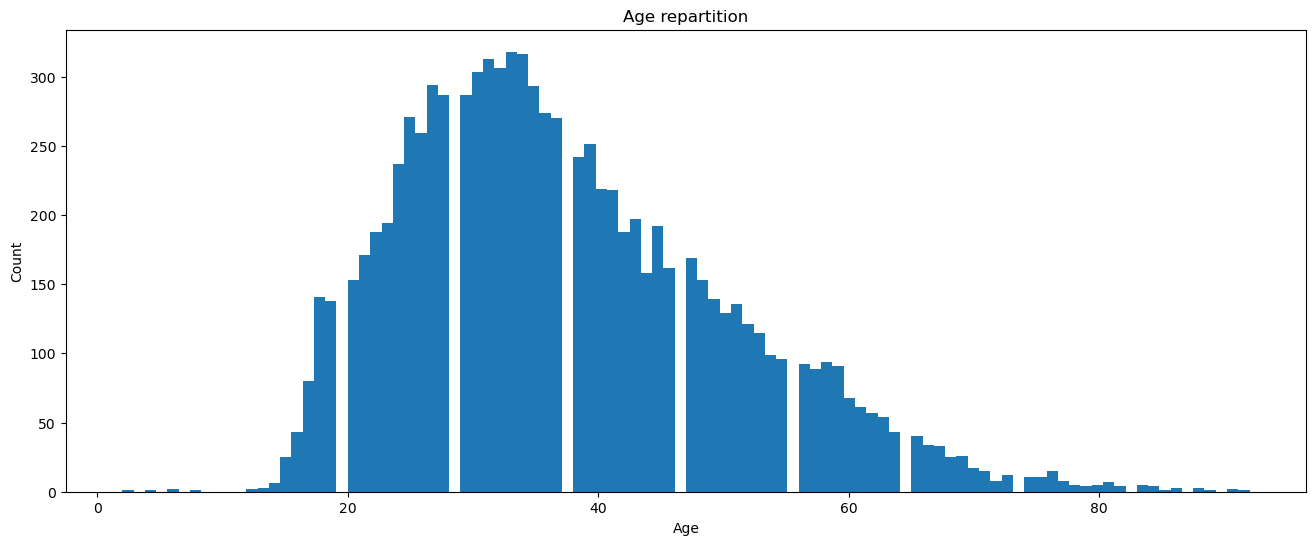

In [168]:
plt.figure(figsize=(16, 6))
plt.hist(clean_age_df.age, bins=100)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age repartition")


plt.show()

###### Density curve

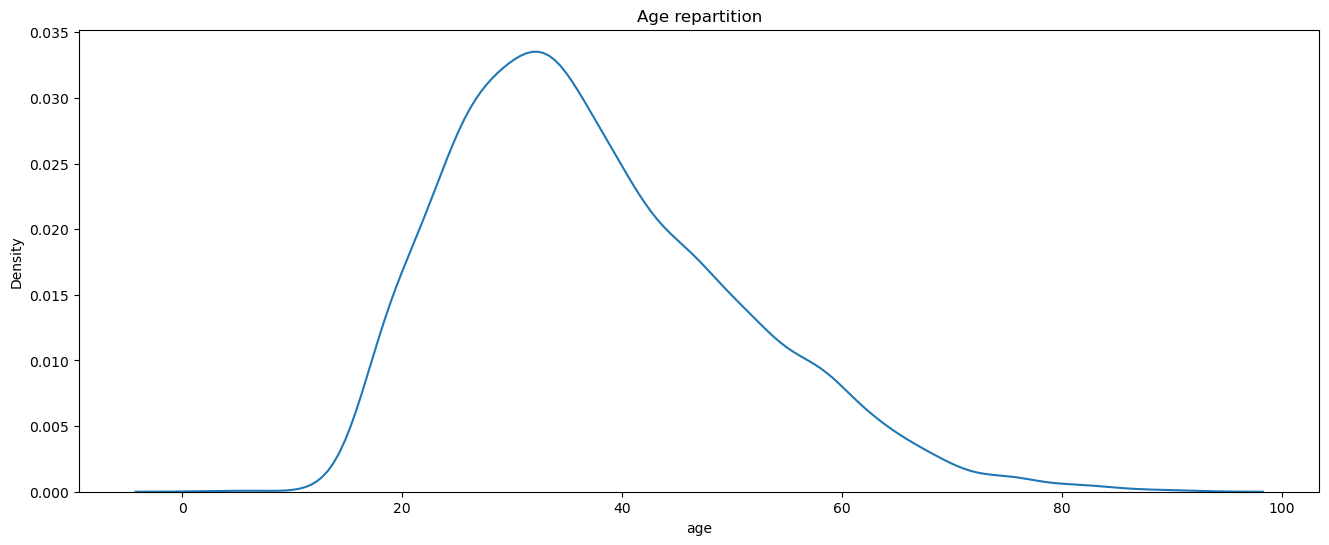

In [169]:

plt.figure(figsize=(16, 6))
sns.kdeplot(clean_age_df.age)
plt.title("Age repartition")


plt.show()

###### Searching for outliers


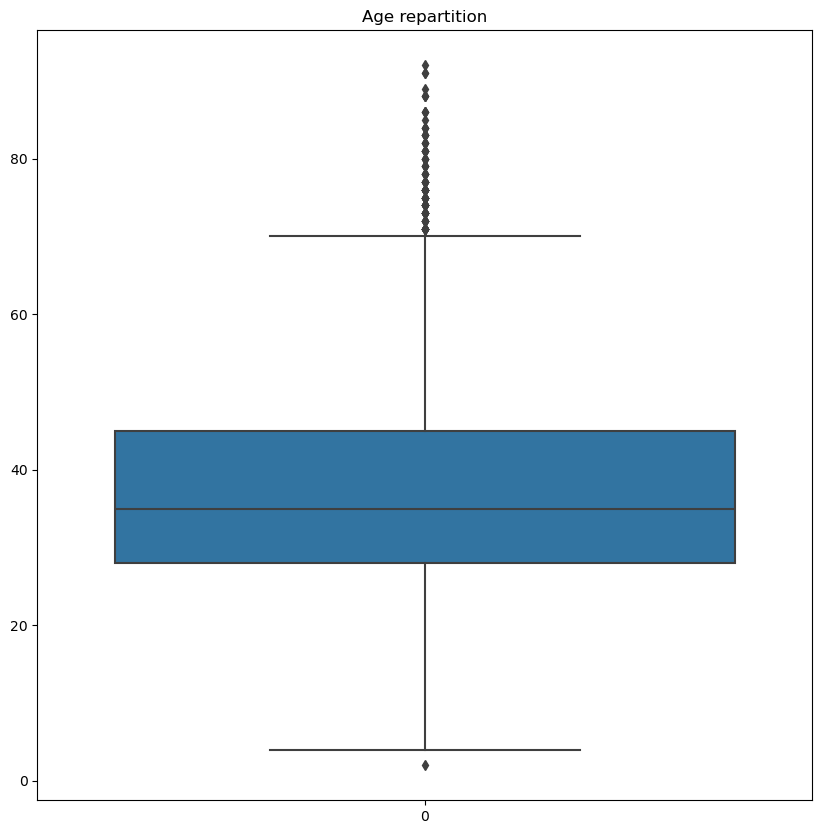

In [170]:

plt.figure(figsize=(10, 10))
sns.boxplot(clean_age_df.age)
plt.title("Age repartition")


plt.show()

There are a few outliers, but they are not true anomalies in the data.
- The min value is 2
- The max is 92.
They are normal values for a human being

In our case, it means there are few individuals with those age. 

###### Kurtosis

In [171]:
print("Kurt: " ,clean_age_df.age.kurtosis())

Kurt:  0.26986217557390857


- function for kurt intrepretation

In [172]:
def explain_kurt(x:float):
    if x == 0:
        return print("\nThere is as much values in queue as normal distribution")
    if x!= 0 and x<0:
        return print("\nThe distribution queue has less values as a normal distribution")
    if x!=0 and x>0:
        return print("\nThe distribution queue has more values as a normal distribution")

In [173]:
print("Conclusion:")
explain_kurt(clean_age_df.age.kurtosis())

Conclusion:

The distribution queue has more values as a normal distribution


###### Skewness

In [174]:
print("Skew: ", clean_age_df.age.skew())

Skew:  0.7185605028707964


In [175]:
def explain_skew(x:float):
    if -0.5 < x < 0.5:
        return print("\nApproximatively symetric distribution")
    if -1 < x < -0.5 or 0.5 < x < 1 :
        return print("\nModerately symetric distribution")
    if x<-1 or  x>1:
        return print("\nStrongly symetric distribution")

In [176]:
print("Conclusion:")
explain_skew(clean_age_df.age.skew())

Conclusion:

Moderately symetric distribution


+ Distribution of age by State

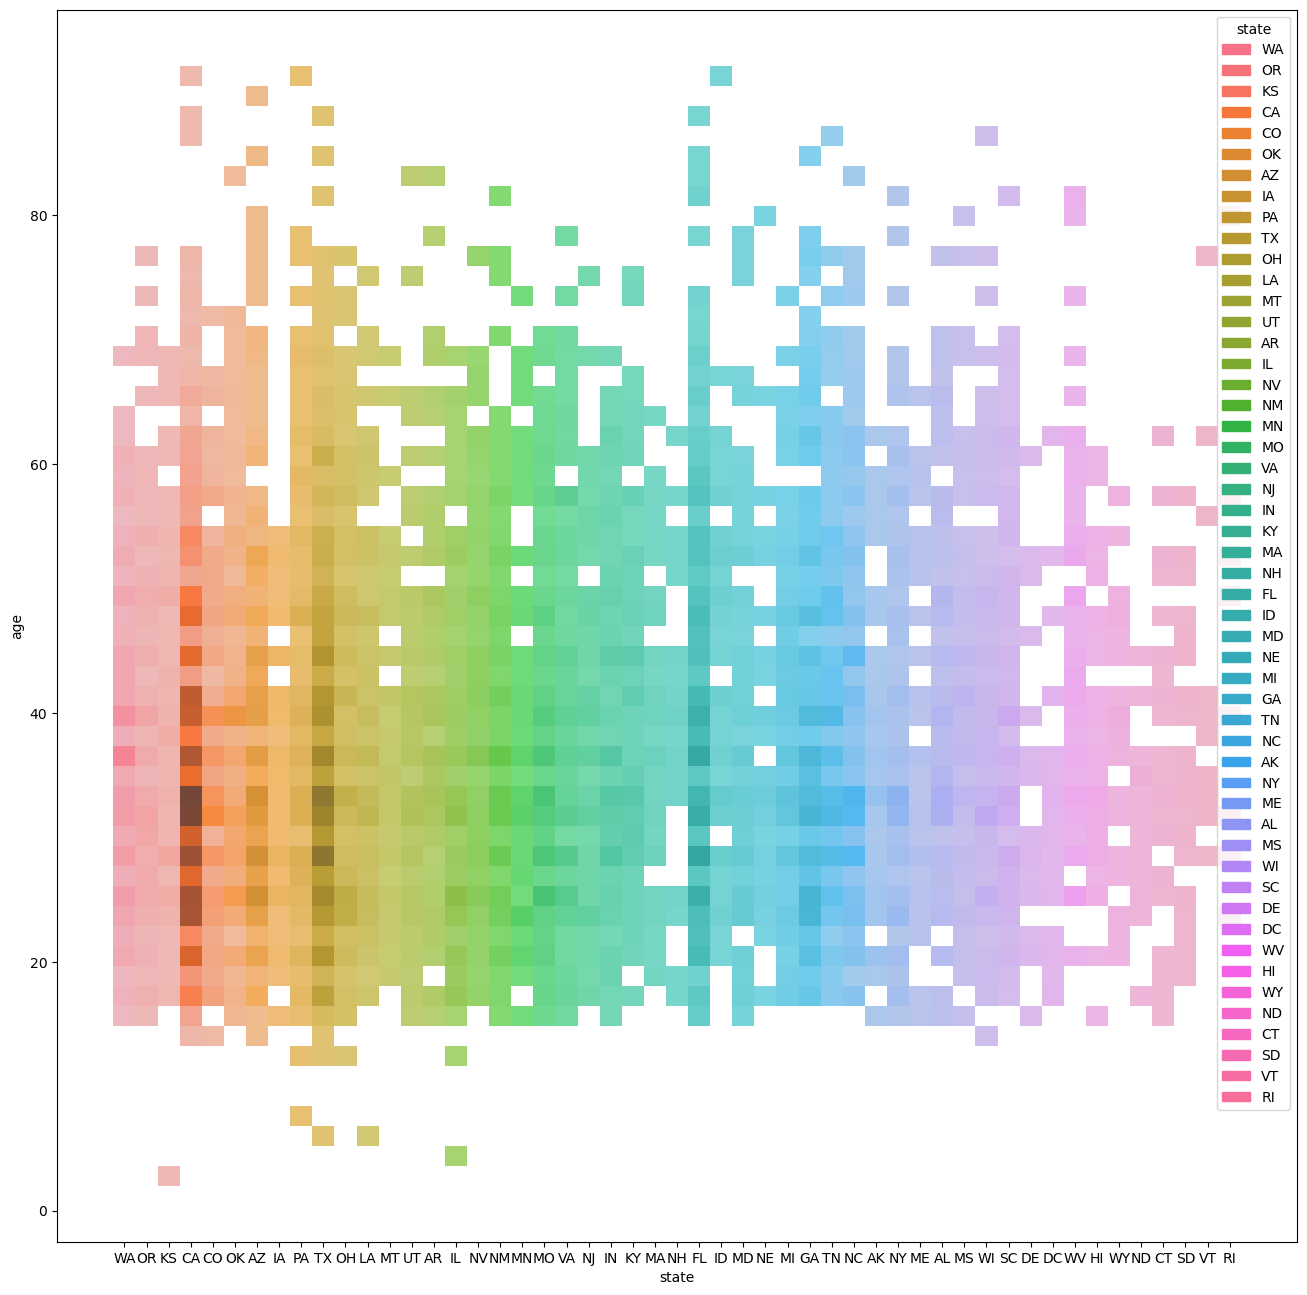

In [177]:
pd.option_context('mode.use_inf_as_na', True)
plt.figure(figsize=(16, 16))
sns.histplot( data=clean_age_df, x="state", y="age",hue="state")
plt.show()

##### Gender


In [178]:
print("\nBefore imputation ")
fedf.gender.isna().sum()
print("Gender NaN values count",fedf.age.isna().sum())
clean_gender_df = fedf.dropna( subset=["gender"])

print("\nAfter imputation ")
print("Verification: \n--> Remaining NaN: ",
clean_gender_df.gender.isna().sum())


Before imputation 
Gender NaN values count 387

After imputation 
Verification: 
--> Remaining NaN:  0


- Distribution by sex

In [179]:
print(clean_gender_df.gender.value_counts().sort_values(ascending=False))

gender
male          9052
female         417
non-binary       1
Name: count, dtype: int64


- Visualisation

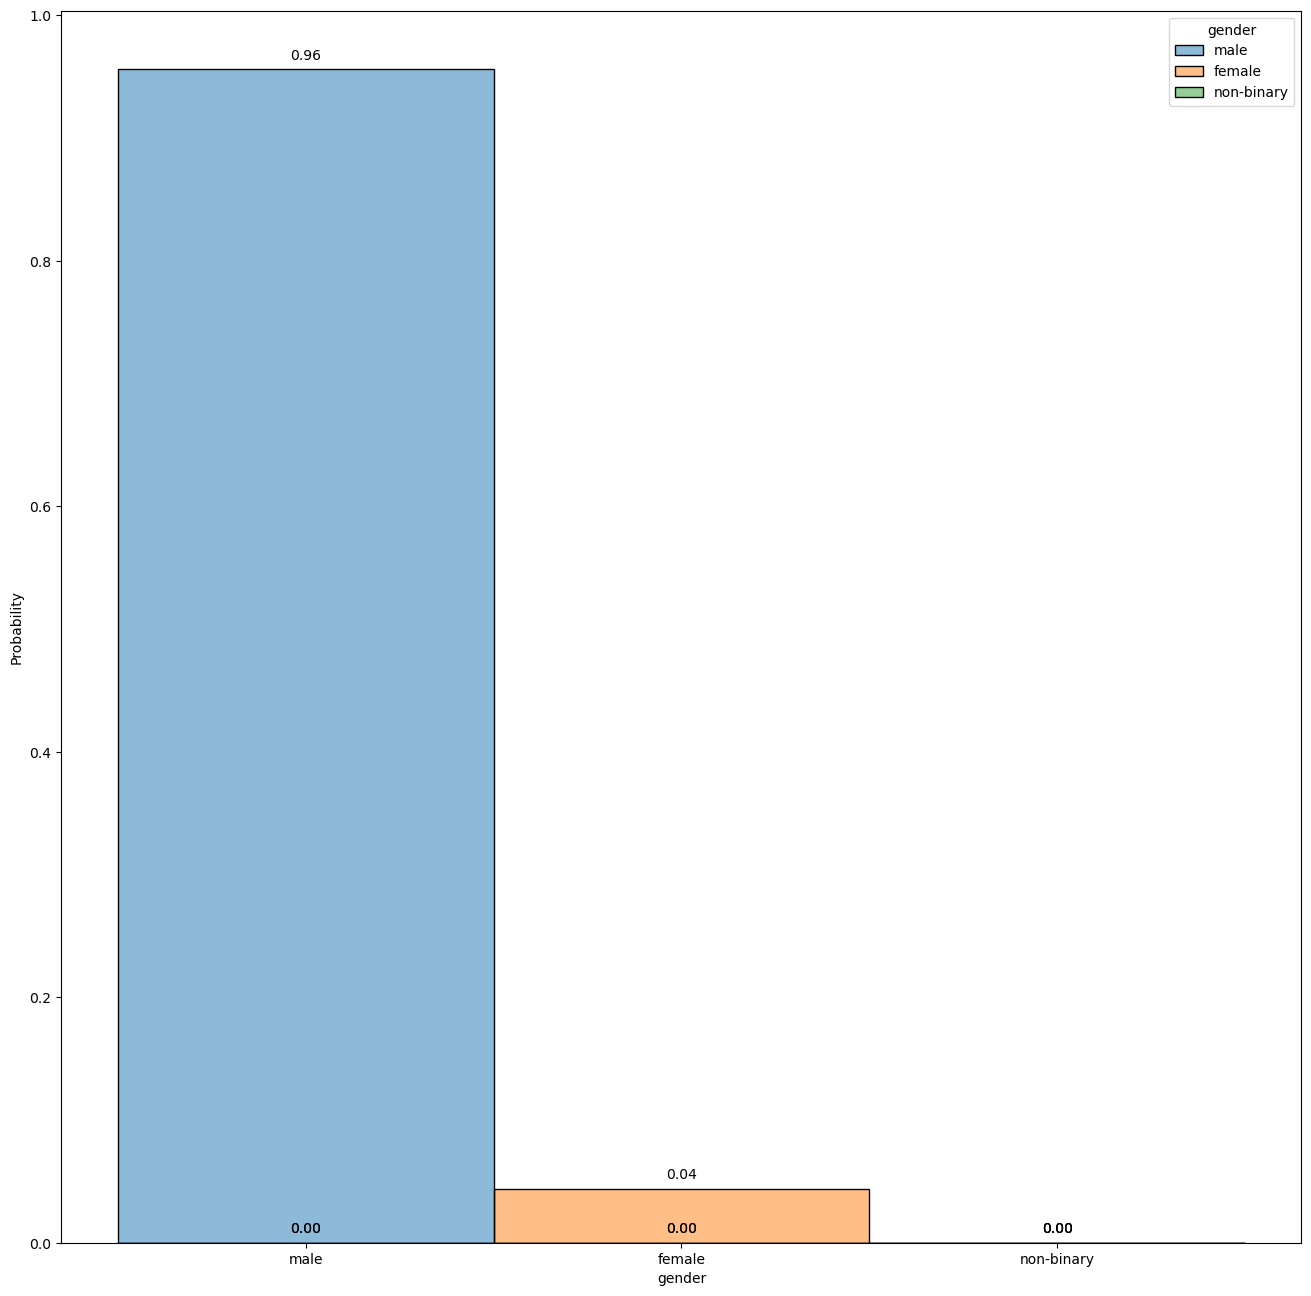

In [180]:
pd.option_context('mode.use_inf_as_na', True)
plt.figure(figsize=(16, 16))
# sns.histplot( data=clean_gender_df, x="gender",hue='gender', stat="probability")

ax = sns.histplot(data=clean_gender_df, x='gender', hue='gender', stat='probability')

# Annotate each bin with its probability value
for rect in ax.patches:
    x = rect.get_x() + rect.get_width() / 2
    y = rect.get_height()
    ax.annotate(f'{y:.2f}', (x, y), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')

plt.show()

We have a probability  P = 0.96 that a selected random observation to be a Male in this data set

+ Contingency table between Gender and state

In [181]:
# Contengency table
contingency_table = pd.crosstab(clean_gender_df.gender, clean_gender_df.state)
contingency_table

state,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
gender,,,,,,,,,,,,,,,,,,,,,
female,2,10,3,23,63,16,0,4,1,32,...,0,16,48,0,10,0,8,3,2,1
male,58,170,130,402,1253,325,30,25,19,576,...,31,249,845,119,161,14,244,146,88,30
non-binary,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


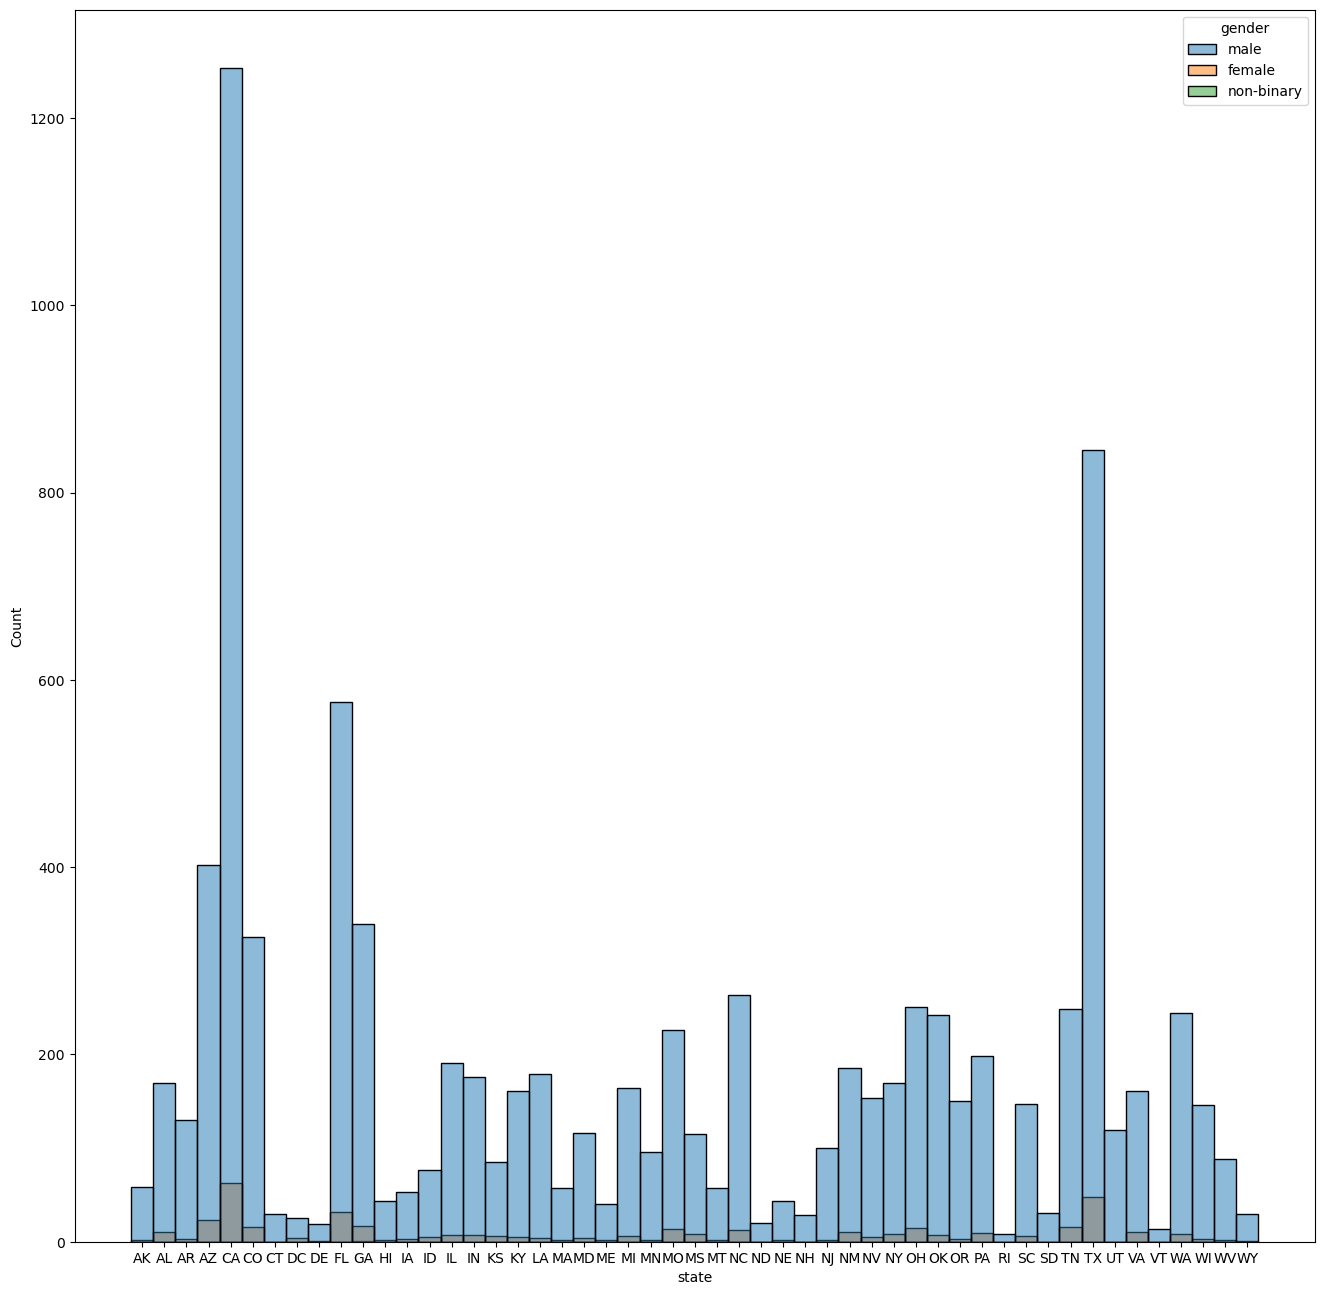

In [182]:
with pd.option_context('mode.use_inf_as_na', True):
    plt.figure(figsize=(16, 16))
    
    sns.histplot( data=clean_gender_df.sort_values(by="state"), x="state",hue='gender', multiple="layer" , )
    plt.show()

+ Conclusion :
  + We can observe that there is more male than female involved in shooting in all state
  + We can't run dependency test between State and Gender because some observation in contengengy table are under 5  

##### T-test between Gender and Age
We want to compare the average age between genders with columns 'age' and 'gender'. 
We ll use a statistical test such as the t-test

In [183]:
# Separate Age by gender
from scipy.stats import ttest_ind
male_ages = clean_age_df[clean_age_df['gender'] == 'male']['age']
female_ages = clean_age_df[clean_age_df['gender'] == 'female']['age']

# Perform t-test
t_statistic, p_value = ttest_ind(male_ages, female_ages)

# Define significance level
alpha = 0.05

# Print results
print("\nConclusion:\n")
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference in average age between genders.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in average age between genders.")


Conclusion:

Fail to reject null hypothesis: There is no significant difference in average age between genders.


##### Race


In [184]:
print("\nBefore imputation ")
fedf.race.isna().sum()
print("Race NaN values count",fedf.race.isna().sum())
clean_race_df = fedf.dropna( subset=["race"])
print("\nThe Race column contains a lot of NaN values, We can replace the NaN value with the most frequent but this will create a bias,therefore we 'll simply remove all observation with NaN")
print("\nAfter imputation ")
print("Verification: \n--> Remaining NaN: ",
clean_race_df.race.isna().sum())


Before imputation 
Race NaN values count 1125

The Race column contains a lot of NaN values, We can replace the NaN value with the most frequent but this will create a bias,therefore we 'll simply remove all observation with NaN

After imputation 
Verification: 
--> Remaining NaN:  0


- Distribution by Race

In [185]:
print(clean_race_df.race.value_counts().sort_values(ascending=False))

race
W        4273
B        2230
H        1540
A         166
N         127
O          30
B;H         2
W;B;N       1
N;H         1
W;H         1
W;B         1
Name: count, dtype: int64


- The output show us multiple comma separated values
  - Base on meta data there are multi-racial or multi-ethnic victims

We ll update the identification by removing ";" to create new kind of variable 

In [186]:
new_clean_race_df = clean_race_df.copy()
new_clean_race_df['race'] = new_clean_race_df['race'].str.replace(';', '')
print(new_clean_race_df.race.value_counts().sort_values(ascending=False))

race
W      4273
B      2230
H      1540
A       166
N       127
O        30
BH        2
WBN       1
NH        1
WH        1
WB        1
Name: count, dtype: int64


- Visualisation

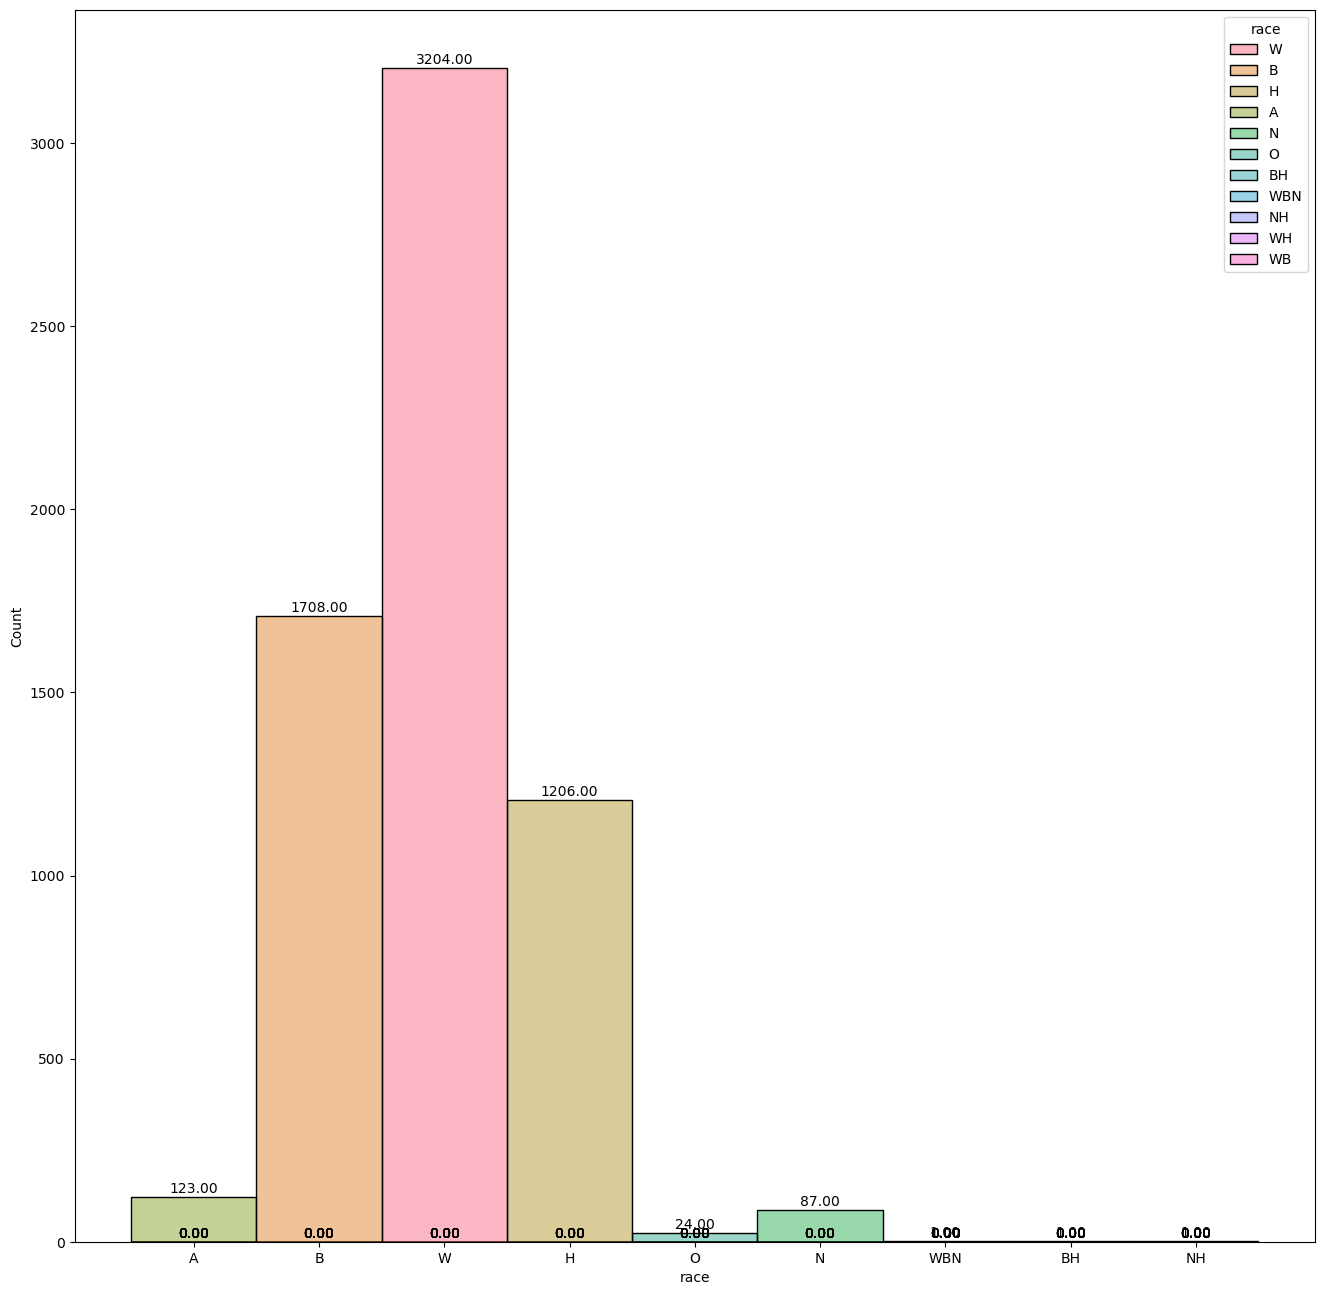

In [187]:
pd.option_context('mode.use_inf_as_na', True)
order_list = new_clean_race_df.race.value_counts().sort_values(ascending=False).keys()
plt.figure(figsize=(16, 16))
# sns.histplot( data=clean_gender_df, x="gender",hue='gender', stat="probability")

ax = sns.histplot(data=new_clean_race_df.value_counts(sort=True), x='race',hue="race", hue_order=order_list)

# Annotate each bin with its probability value
for rect in ax.patches:
    x = rect.get_x() + rect.get_width() / 2
    y = rect.get_height()
    ax.annotate(f'{y:.2f}', (x, y), xytext=(0, 1), textcoords='offset points', ha='center', va='bottom')

plt.show()

The top 3 position are White, Black and Hispanic

+ Contingency table between Race and State

In [188]:
# Contengency table
contingency_table = pd.crosstab(new_clean_race_df.race, new_clean_race_df.state)
contingency_table

state,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
race,,,,,,,,,,,,,,,,,,,,,
A,2,0,2,0,49,5,0,0,0,2,...,1,1,11,2,1,0,16,4,1,0
B,3,50,32,37,199,30,8,26,8,181,...,0,64,206,8,61,0,34,35,11,2
BH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
H,0,5,0,140,509,79,7,0,1,74,...,0,7,303,19,5,1,30,10,0,2
N,12,0,0,16,5,5,0,0,0,0,...,10,0,1,3,1,1,7,4,0,2
NH,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
O,0,0,0,0,10,0,0,0,0,4,...,0,1,5,0,1,0,0,0,0,0
W,32,100,79,173,327,166,13,3,9,286,...,16,166,343,67,89,11,105,90,60,19
WB,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


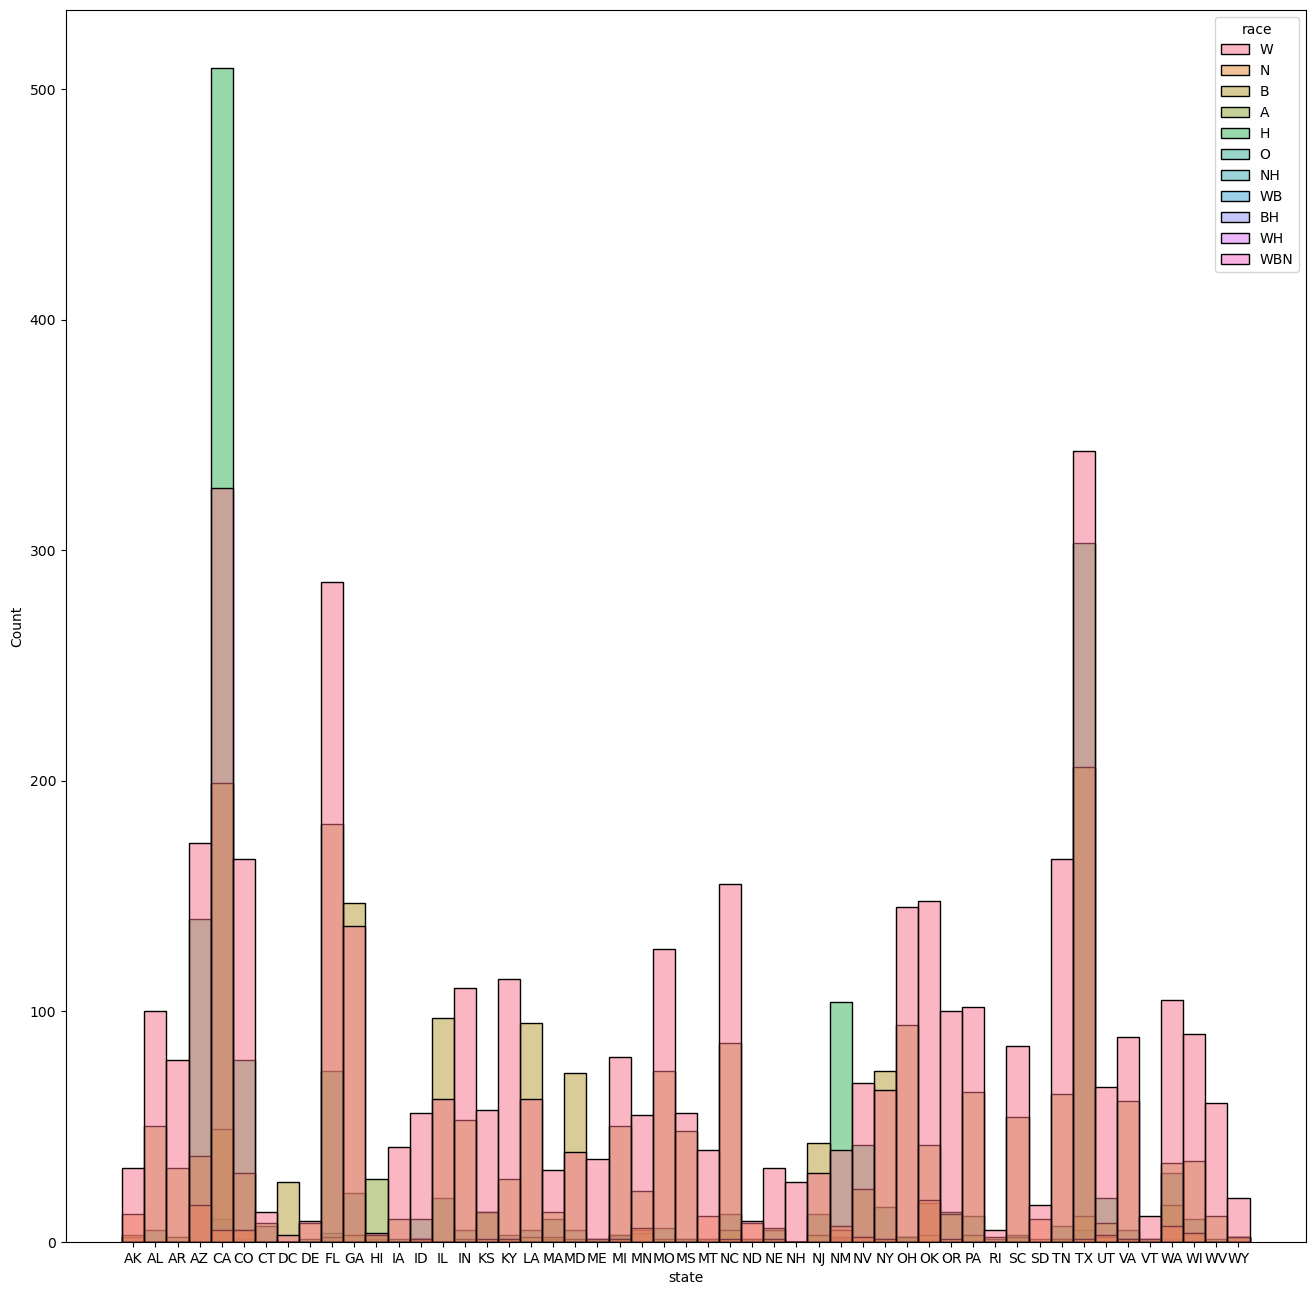

In [189]:
with pd.option_context('mode.use_inf_as_na', True):
    plt.figure(figsize=(16, 16))
    
    sns.histplot( data=new_clean_race_df.sort_values(by="state"), x="state",hue='race'  )
    plt.show()

+ Conclusion :
  + We can see that globaly all race are represented in each state.
###### For a better visualisation, we ll display each race distribution in every State

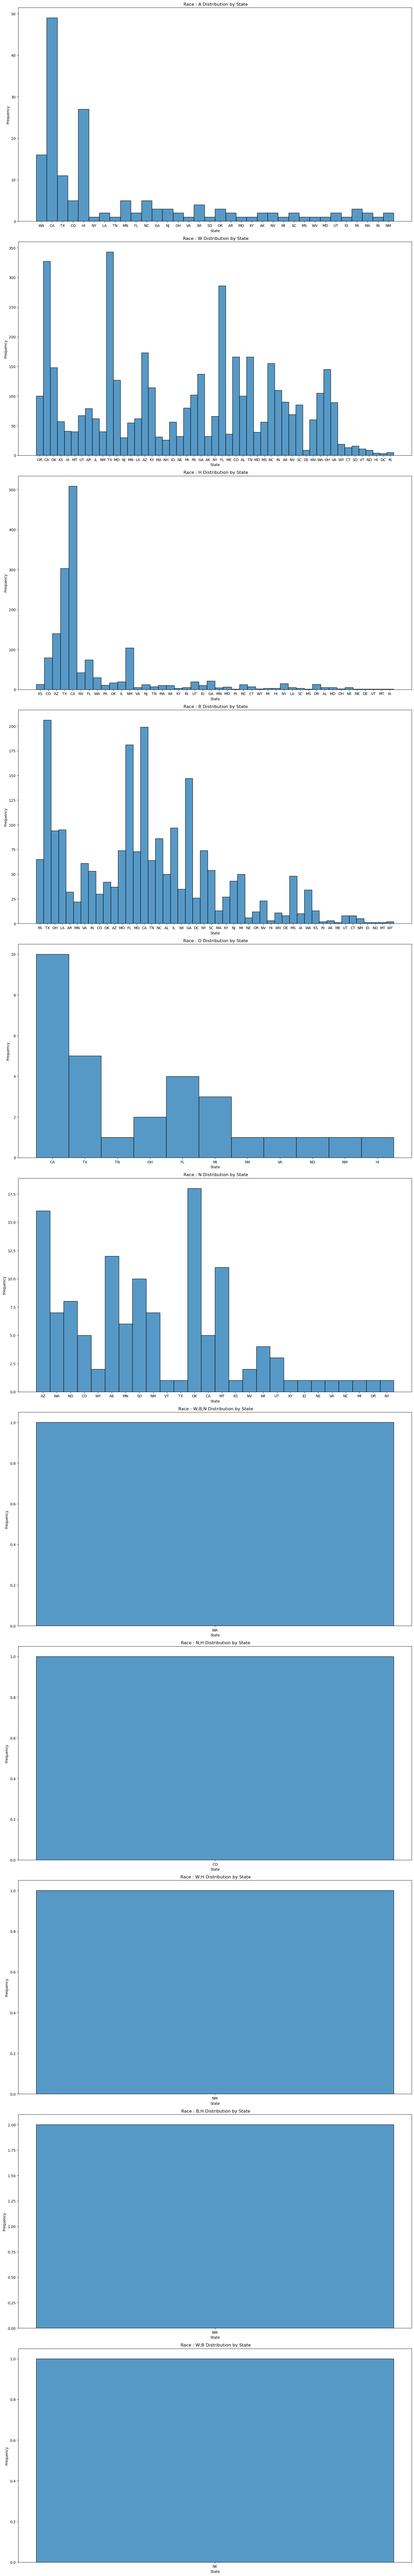

In [190]:
# Get unique races
unique_races = clean_race_df['race'].unique()

# Determine number of rows for subplots based on the number of races
num_rows = len(unique_races)

# Create subplots with one column
fig, axs = plt.subplots(num_rows, 1, figsize=(16, 9 * num_rows))

# Plot each race
for i, race in enumerate(unique_races):
    race_df = clean_race_df[clean_race_df['race'] == race]
    sns.histplot(data=race_df, x='state', multiple='stack', ax=axs[i])
    axs[i].set_title(f' Race : {race} Distribution by State')
    axs[i].set_xlabel('State')
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

##### ANOVA Test to Compare the Means of Age Across Different Race Groups

In this section we 'll not take into consideration groups like BH.NH,BW,WH,WBN as they are too few.
We assume also that all observation follows a normal distribution, they are independent and have equal variance for each group. 

###### Verification of normal distribution

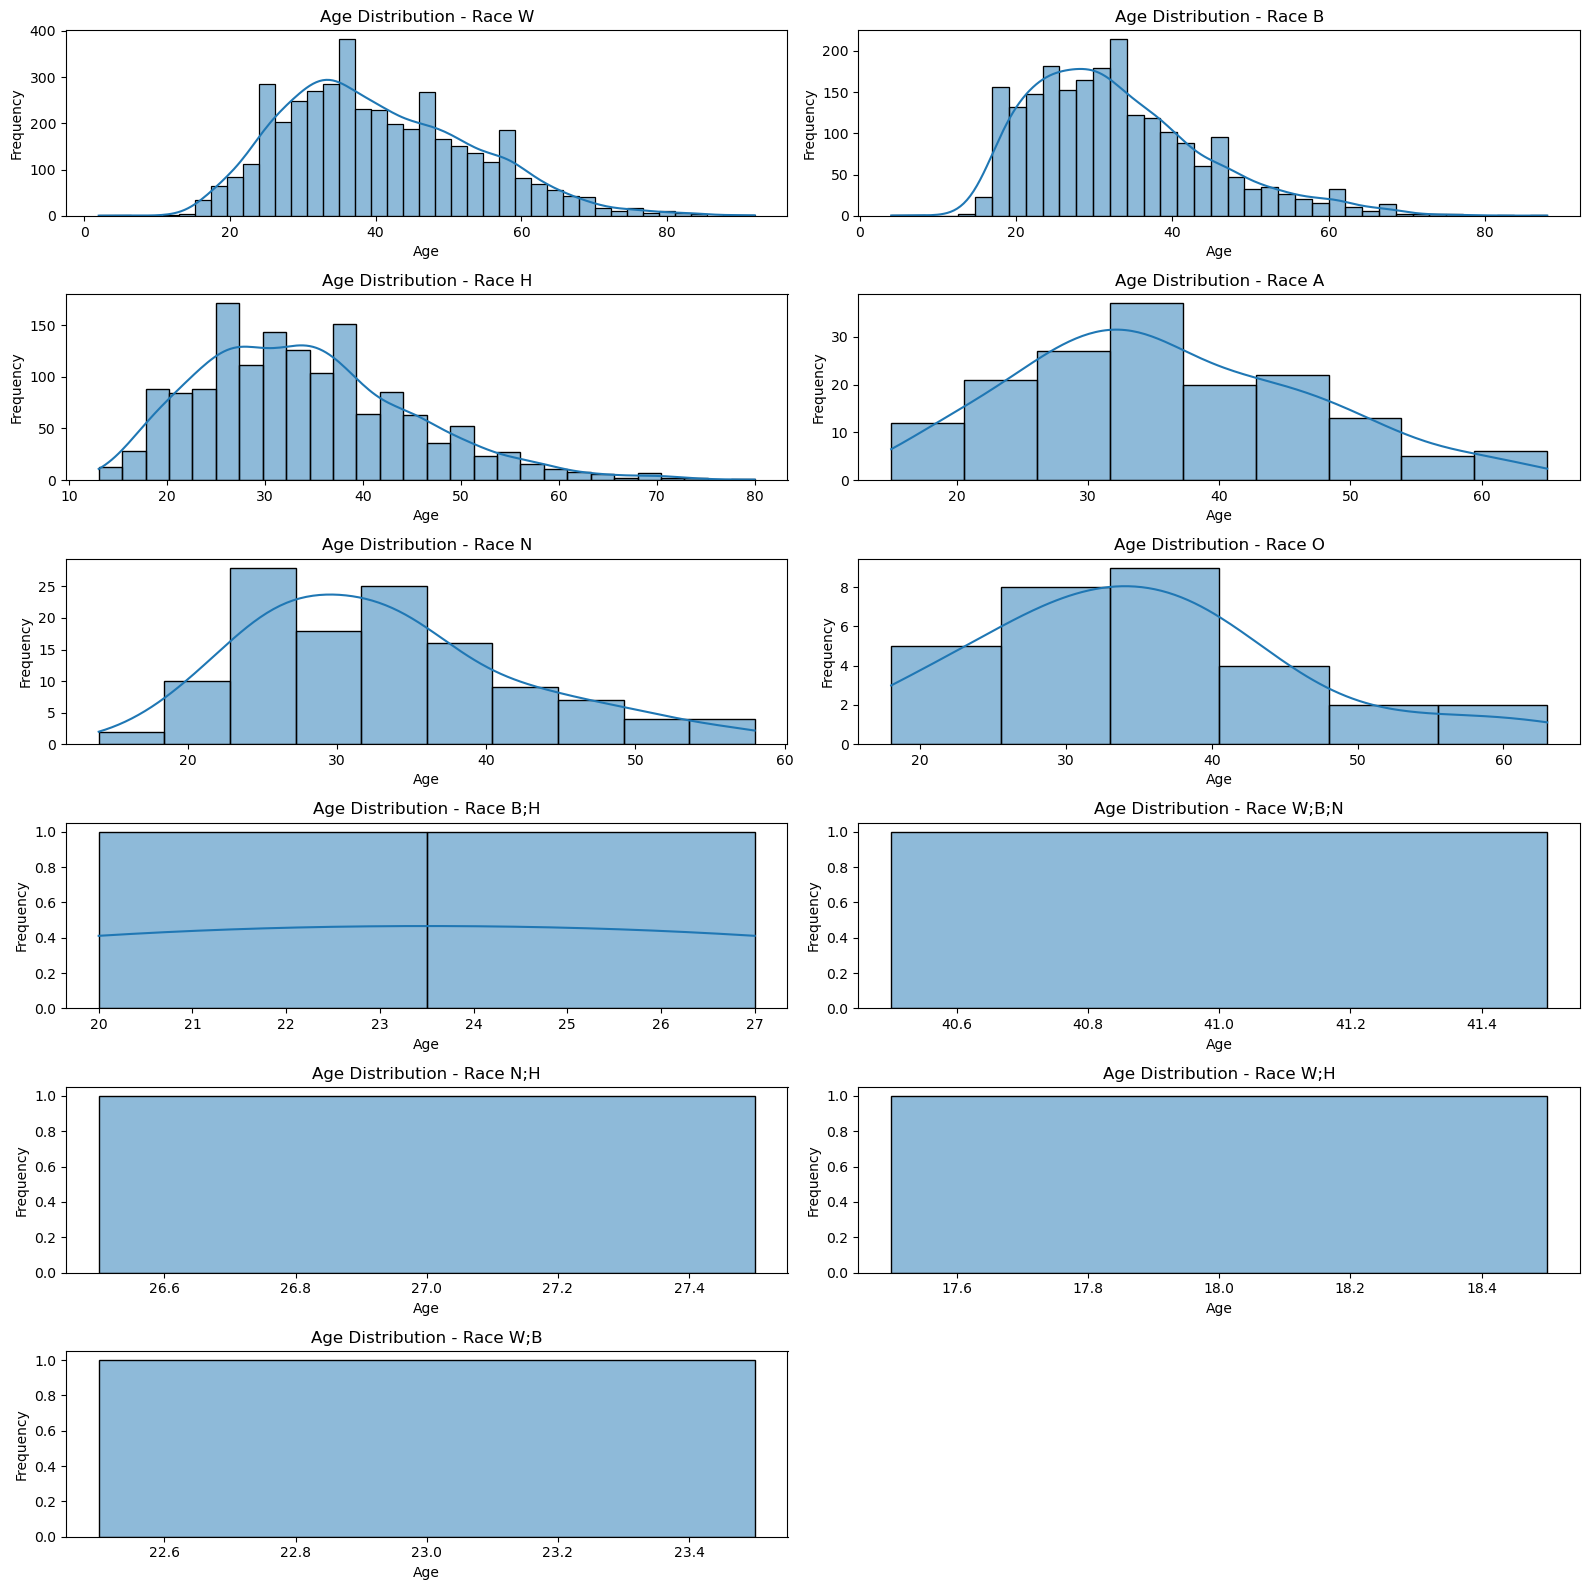

In [191]:
race_counts = clean_race_df['race'].value_counts()

# Calculate number of rows and columns for subplots based on race count
num_rows = (len(race_counts) + 1) // 2
num_cols = 2

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(16, 16))

# Flatten axs if it's a single row
if num_rows == 1:
    axs = axs.reshape(1, -1)

# Plot each race group
for i, (race, count) in enumerate(race_counts.items()):
    row = i // num_cols
    col = i % num_cols
    sns.histplot(clean_race_df[clean_race_df['race'] == race]['age'], kde=True, ax=axs[row, col])
    axs[row, col].set_title(f'Age Distribution - Race {race}')
    axs[row, col].set_xlabel('Age')
    axs[row, col].set_ylabel('Frequency')

# Hide empty subplots
for i in range(len(race_counts), num_rows * num_cols):
    axs.flatten()[i].axis('off')

plt.tight_layout()
plt.show()

###### Evaluation

In [192]:
# Separate age by race groups
from scipy.stats import f_oneway
white_ages = clean_gender_df[clean_gender_df['race'] == 'W']['age']
black_ages = clean_gender_df[clean_gender_df['race'] == 'B']['age']
hispanic_ages = clean_gender_df[clean_gender_df['race'] == 'H']['age']
native_american_ages = clean_gender_df[clean_gender_df['race'] == 'N']['age']

# Perform ANOVA test
f_statistic, p_value = f_oneway(white_ages, black_ages, hispanic_ages, native_american_ages)

# Define significance level
alpha = 0.05

# Print results
print("\nConclusion:\n")
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference in average age between race groups.\n")
else:
    print("Fail to reject null hypothesis: There is no significant difference in average age between race groups.\n")



Conclusion:

Fail to reject null hypothesis: There is no significant difference in average age between race groups.



##### State With the Highest Number of Black Death  

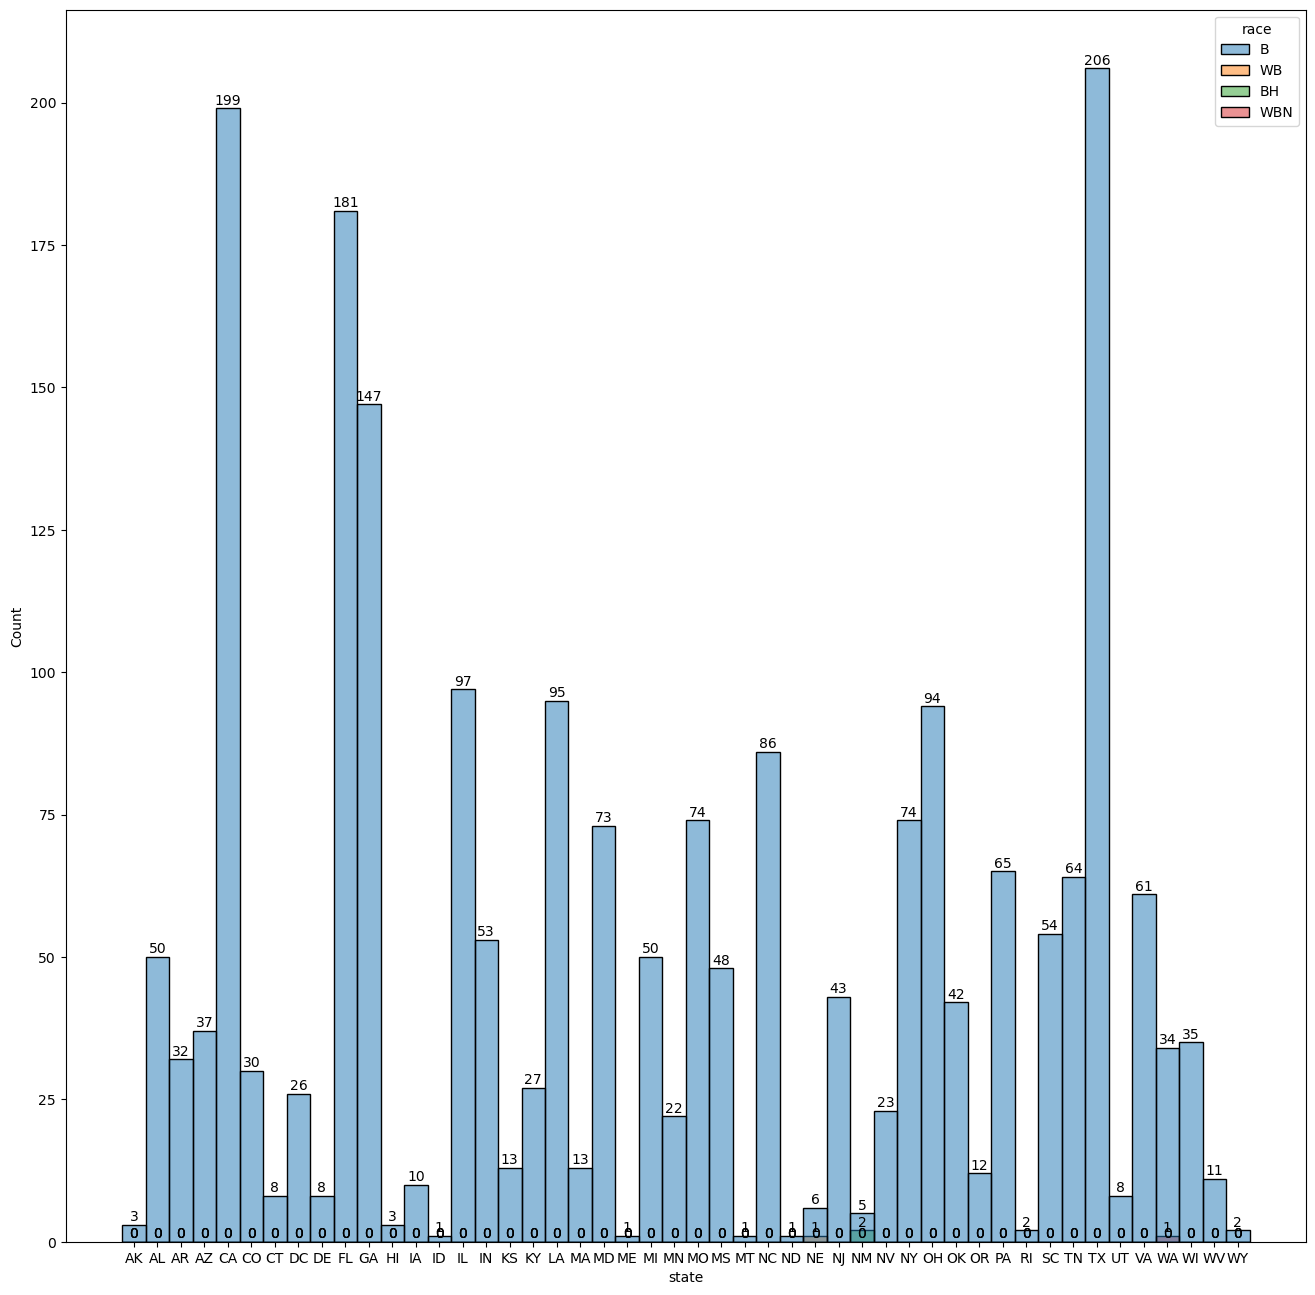

In [193]:
filtered_df = new_clean_race_df[new_clean_race_df['race'].str.contains('B|WB|BH|WBN')]
filtered_df.shape
with pd.option_context('mode.use_inf_as_na', True):
    plt.figure(figsize=(16, 16))
    
    ax= sns.histplot( data=filtered_df.sort_values(by="state"), x="state",hue='race'  )
    for rect in ax.patches:
        x = rect.get_x() + rect.get_width() / 2
        y = rect.get_height()
        ax.annotate(f'{y:.0f}', (x, y), xytext=(0, 1), textcoords='offset pixels', ha='center', va='bottom')
        
    plt.show()

###### Conclusion : 
    + Even if Californie state has the most count of fatal shooting even, Texas is more deadly for Black 

#### Shooting Involving People with Mental Disorders


##### Frequency of Shooting Involving Individuals With Mental Disorders

In [194]:
fsmrdf = civil_df.was_mental_illness_related
# Checking the data type
fsmrdf.dtypes

dtype('bool')

In [195]:
# New NaN values check
print("\n Looking for NaN values :")
fsmrdf.isnull().sum()


 Looking for NaN values :


0

+ We have 0 NaN 

###### Extraction mentally ill observation


In [196]:
illdf = civil_df[civil_df.was_mental_illness_related==True]
illdf.head(2)

,id,date,threat_type,flee_status,armed_with,city,county,state,latitude,longitude,location_precision,name,age,gender,race,race_source,was_mental_illness_related,body_camera,agency_ids
0,3,2015-01-02,point,not,gun,Shelton,Mason,WA,47.246826,-123.121592,not_available,Tim Elliot,53.0,male,A,not_available,True,False,73
3,8,2015-01-04,point,not,replica,San Francisco,San Francisco,CA,37.762910,-122.422001,not_available,Matthew Hoffman,32.0,male,W,not_available,True,False,196


In [197]:
# Get Frequencies using pandas value_count
illdata_df = civil_df.was_mental_illness_related.value_counts(normalize=True)
illdata_df

was_mental_illness_related
False    0.800358
True     0.199642
Name: proportion, dtype: float64

- Conclusion :
  - Shooting involving mentally ill person are less frequent by around 1/5
  

In [198]:

print(f"Frequency of apparition of declared mentally ill civil: {illdata_df.values[1]*100}%")

Frequency of apparition of declared mentally ill civil: 19.96419922080657%


- Visualisation

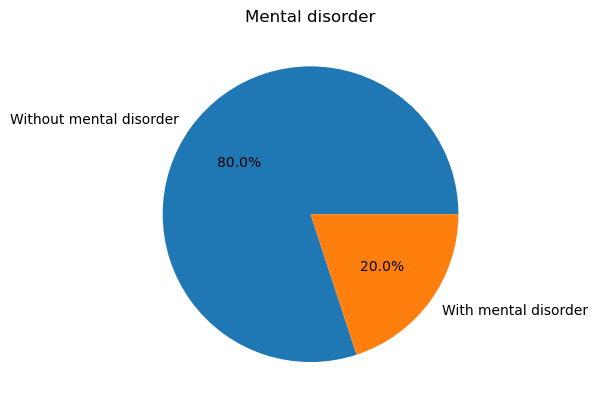

In [199]:
plt.pie(civil_df.was_mental_illness_related.value_counts(),labels=["Without mental disorder","With mental disorder"], autopct="%1.1f%%")
plt.title("Mental disorder")
plt.show()

#####  Gender Repartition of Individuals With Mental Disorder

- Visualisation

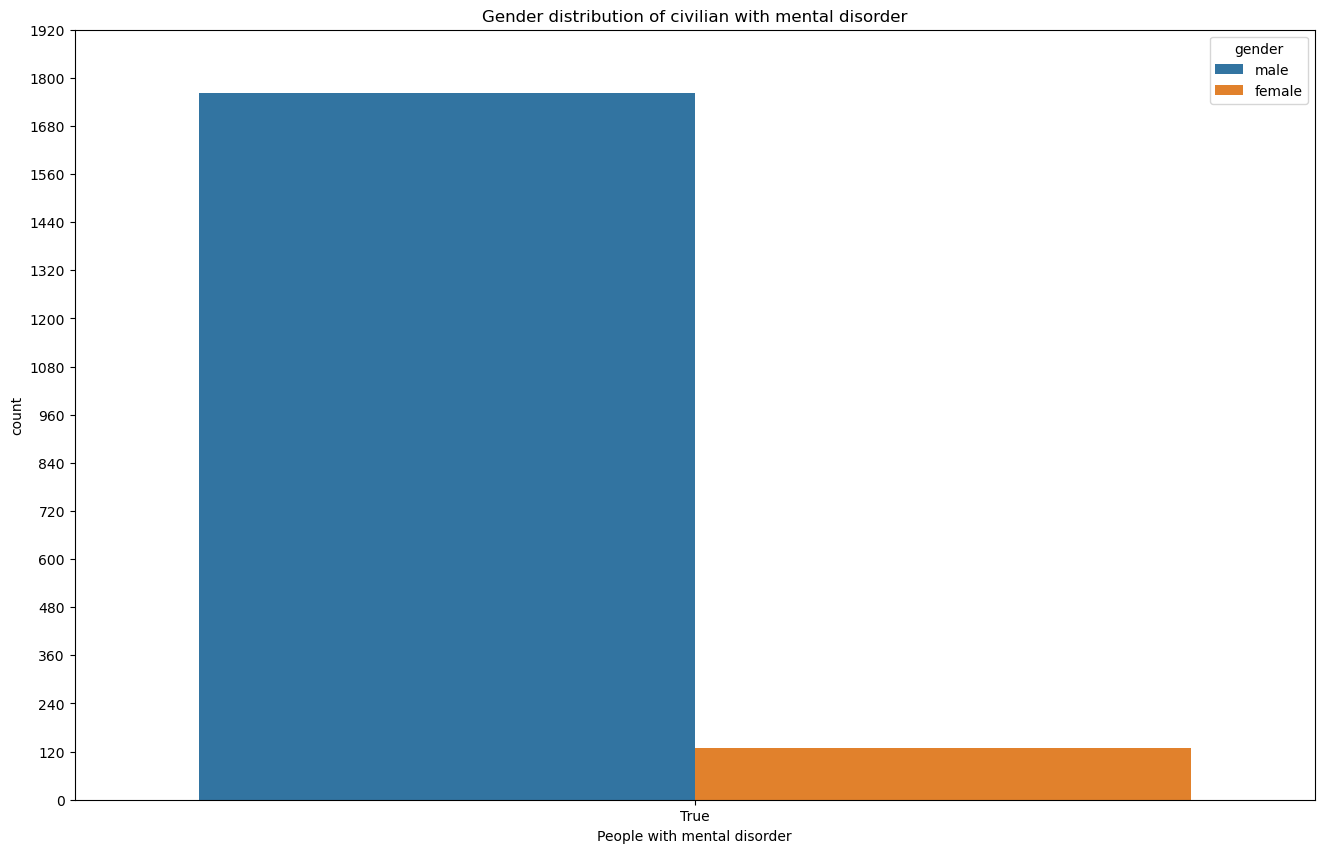

In [200]:
fig, ax = plt.subplots(figsize=(16, 10))

sns.countplot(illdf, x="was_mental_illness_related", hue="gender")
plt.yticks(np.arange(0, 2000, step=120))
plt.xlabel("People with mental disorder")
plt.title("Gender distribution of civilian with mental disorder")
plt.show()

- Conclusion
  - Mentally ill Woman are less involved than Men 

#### Cross-analysis Between Fleeing Status and Armed_with Variables Related to Individuals With Mental Disorder

##### Contingency Table

In [201]:
freq_conj = pd.crosstab(illdf.threat_type, illdf.flee_status)
print("Contingency table for Threat type and Flee status")
print(freq_conj)

Contingency table for Threat type and Flee status
flee_status   car  foot  not  other
threat_type                        
attack         19    21  216      3
flee            6     4    0      3
move            7     6   62      0
point          23    25  363      7
shoot          31    34  284      6
threat         31    39  469      8
undetermined    3     1   22      1


- Visualisation

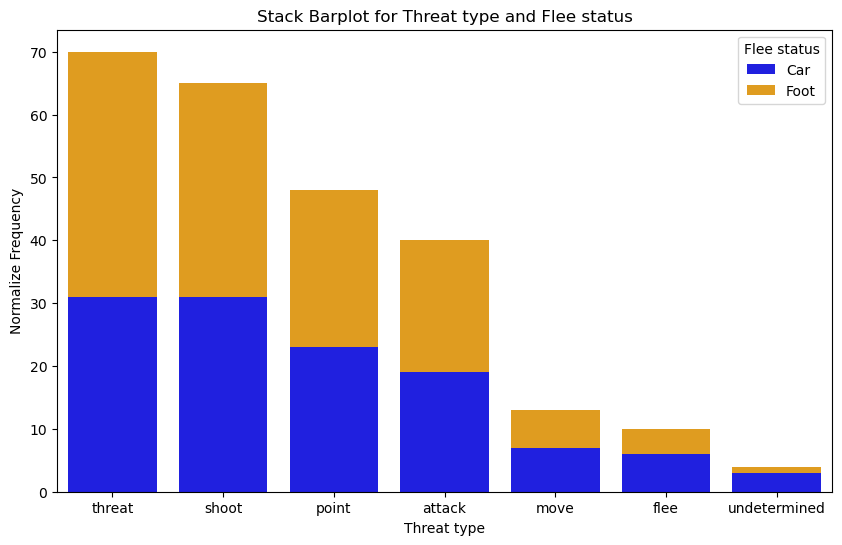

In [202]:


plt.figure(figsize=(10, 6))

# Calculate total frequency for each threat type
freq_conj['total'] = freq_conj['car'] + freq_conj['foot']

# Sort dataframe by total frequency in descending order
freq_conj_sorted = freq_conj.sort_values(by='total', ascending=False)
sns.barplot(data=freq_conj_sorted.reset_index(), x='threat_type', y='car', color='blue', label='Car')
sns.barplot(data=freq_conj_sorted.reset_index(), x='threat_type', y='foot', color='orange', label='Foot',bottom=freq_conj_sorted.reset_index()['car'])
plt.title('Stack Barplot for Threat type and Flee status')
plt.xlabel('Threat type')
plt.ylabel('Normalize Frequency')
plt.legend(title='Flee status')
plt.show()

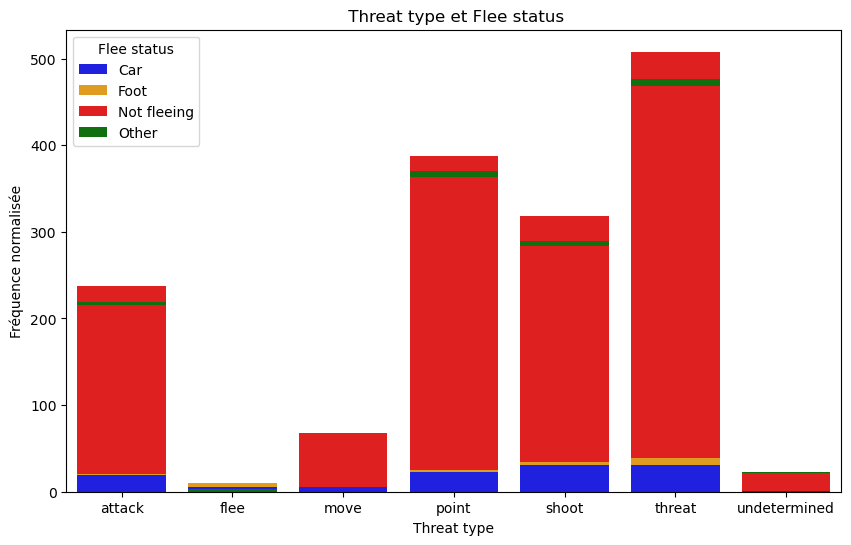

In [203]:


plt.figure(figsize=(10, 6))

# Calculate cumulative sums for each category within each threat type
cumulative_sum = freq_conj.groupby('threat_type').cumsum()

sns.barplot(data=freq_conj.reset_index(), x='threat_type', y='car', color='blue', label='Car')
sns.barplot(data=freq_conj.reset_index(), x='threat_type', y='foot', color='orange', bottom=cumulative_sum['car'], label='Foot')
sns.barplot(data=freq_conj.reset_index(), x='threat_type', y='not', color='red', bottom=cumulative_sum['foot'], label='Not fleeing')
sns.barplot(data=freq_conj.reset_index(), x='threat_type', y='other', color='green', bottom=cumulative_sum['not'], label='Other')

plt.title(' Threat type et Flee status')
plt.xlabel('Threat type')
plt.ylabel('Fréquence normalisée')
plt.legend(title='Flee status')
plt.show()

- Conclusion
   - We can see that a lot of people are shot when not fleeing no matter if they are on foot or in a car and
     one has a better chance of staying alive when fleeing.

#####  Dependency Test
We ll use the chi-square test of independence  to evaluates whether there is a significant association between the two categorical variables.
###### Note :
Some cells in the contingency table (cross-tabulation of the two categorical variables) have less than the expected count of at least 5. The chi-square test may not be valid, and an alternative test, such as Fisher's exact test, should be considered but Fisher test requires a matrix of 2x2 thus not eligible in this situation.

 We'll do a dependency test with alpha = 0,05.
 
 - Null Hypothesis
   -  H0: Threat type and flee status are independant
  
   - H1:  Threat type and flee status are dependant

In [204]:
from scipy.stats import chi2_contingency

# Contengency table
contingency_table = pd.crosstab(illdf.threat_type, illdf.flee_status)

print("Contengency table 'Threat type' et 'Flee status':")
print(contingency_table)

# Test d'indépendance du khi-deux
chi2, p, ddl, freq = chi2_contingency(contingency_table)

print("\nRésults of khi-deux test ")
print("\nStatistic Chi-Square", chi2)
print("\n p-value", p)
print("\nFreedom Degree", ddl)
print("\nExpected Frequencies Table")
print(freq)

# Conclusion
alpha = 0.05
print("\nConclusion :")
if p < alpha:
    print("We reject (H0)  'Threat type' and 'Flee status' are dependent.")
else:
    print("We can't reject (H0) 'Threat type' and 'Flee status' are independent.")

Contengency table 'Threat type' et 'Flee status':
flee_status   car  foot  not  other
threat_type                        
attack         19    21  216      3
flee            6     4    0      3
move            7     6   62      0
point          23    25  363      7
shoot          31    34  284      6
threat         31    39  469      8
undetermined    3     1   22      1

Résults of khi-deux test 

Statistic Chi-Square 97.4928102319803

 p-value 6.362135321800086e-13

Freedom Degree 18

Expected Frequencies Table
[[1.83471074e+01 1.98760331e+01 2.16495868e+02 4.28099174e+00]
 [9.20897285e-01 9.97638725e-01 1.08665880e+01 2.14876033e-01]
 [5.31286895e+00 5.75560803e+00 6.26918536e+01 1.23966942e+00]
 [2.96103896e+01 3.20779221e+01 3.49402597e+02 6.90909091e+00]
 [2.51475797e+01 2.72432113e+01 2.96741440e+02 5.86776860e+00]
 [3.87485242e+01 4.19775679e+01 4.57232586e+02 9.04132231e+00]
 [1.91263282e+00 2.07201889e+00 2.25690673e+01 4.46280992e-01]]

Conclusion :
We reject (H0)  'Threat t

#### Visualisation of the Shooting Throughout Time

##### Fatal Police Shootings by Month
This section generates a bar chart depicting the number of fatal police shootings per month. The data is grouped by month to observe trends over time, which can help identify specific periods with higher incidents and guide further analysis or policy adjustments.

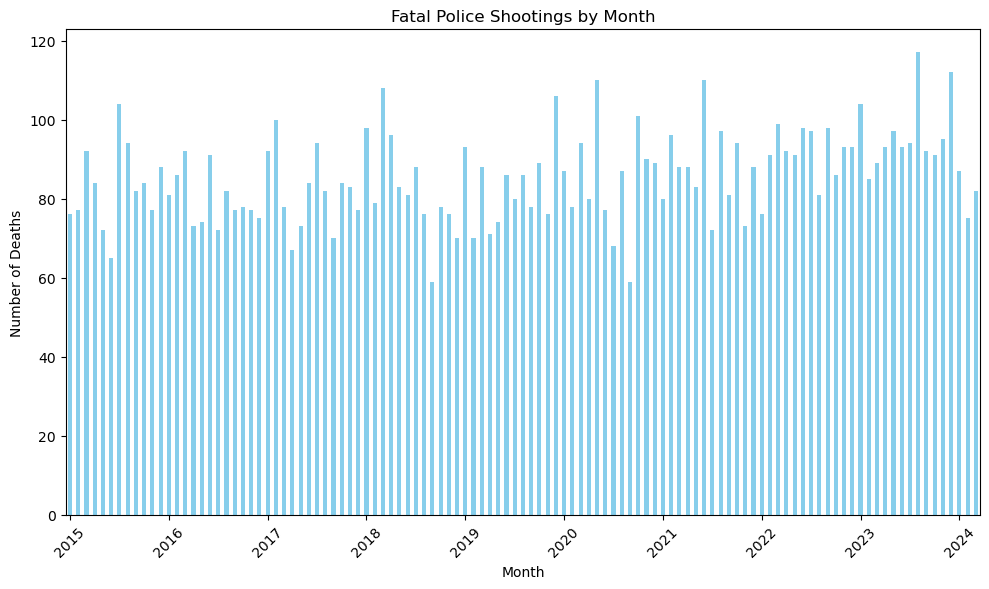

In [205]:

monthly_deaths = fedf.groupby(fedf['date'].dt.to_period('M'))['name'].count()

plt.figure(figsize=(10, 6))
monthly_deaths.plot(kind='bar', color='skyblue')
plt.title('Fatal Police Shootings by Month')
plt.xlabel('Month')
plt.ylabel('Number of Deaths')
years = list(set(monthly_deaths.index.year))
year_positions = [list(monthly_deaths.index.year).index(year) for year in years]
plt.xticks(ticks=year_positions, labels=years, rotation=45)
plt.tight_layout()
plt.show()

##### Most Fatal Month by Year for Police Shootings
In this section, we determine the most fatal month of each year for police shootings. This analysis helps in understanding if there are particular times of the year that are consistently riskier, which can be crucial for law enforcement planning and community awareness.

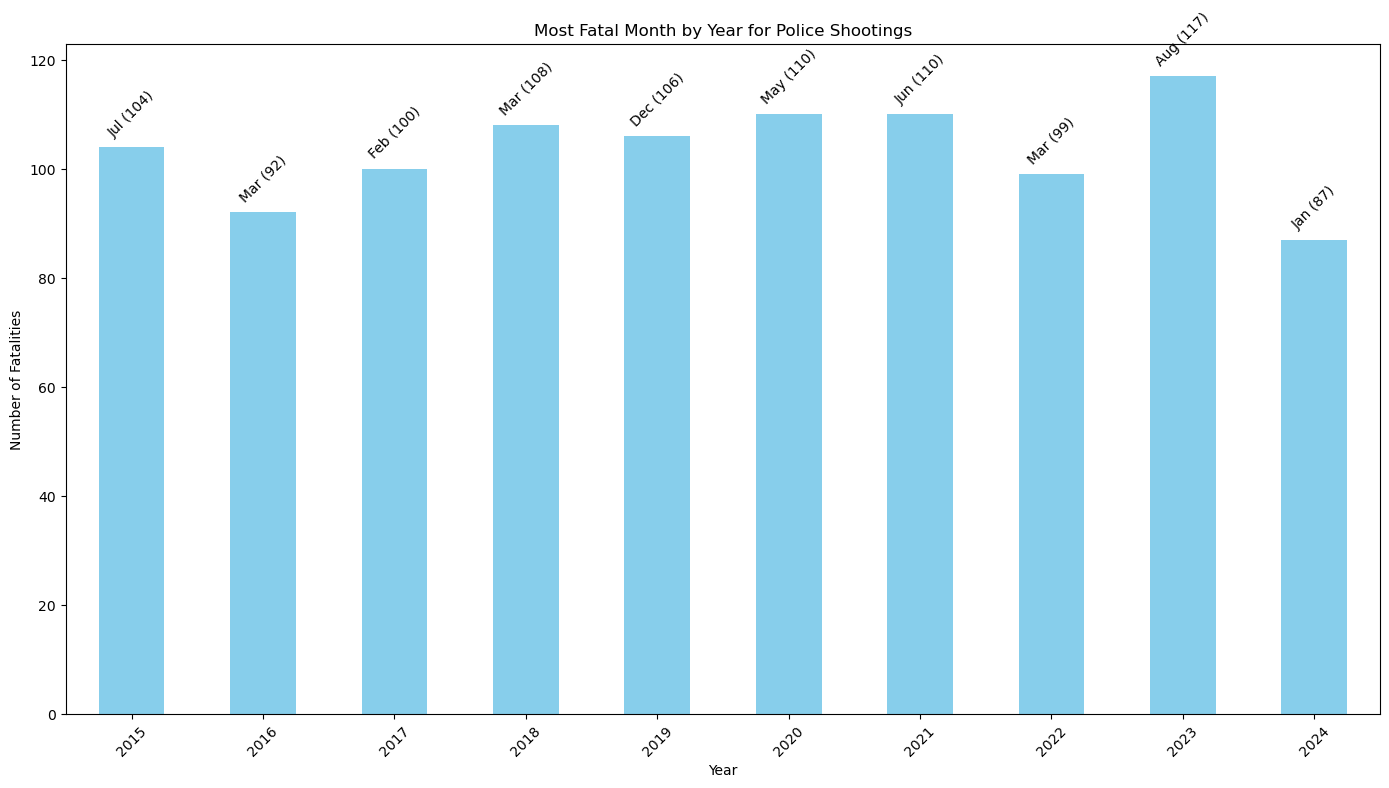

In [206]:



fedf['year'] = fedf['date'].dt.year
fedf['month'] = fedf['date'].dt.month
month_group = fedf.groupby(['year', 'month']).size()
worst_month_per_year = month_group.groupby('year').idxmax()
worst_month_deaths = month_group.loc[worst_month_per_year]


month_names = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
               7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

plot_data = pd.DataFrame({
    'Year': [idx[0] for idx in worst_month_deaths.index],
    'Month': [month_names[idx[1]] for idx in worst_month_deaths.index],
    'Deaths': worst_month_deaths.values
})

fig, ax = plt.subplots(figsize=(14, 8))
plot_data.set_index('Year').plot(kind='bar', y='Deaths', ax=ax, legend=False, color='skyblue')
plt.title('Most Fatal Month by Year for Police Shootings')
plt.ylabel('Number of Fatalities')
plt.xlabel('Year')

for index, row in plot_data.iterrows():
    ax.text(index, row['Deaths'] + 2, f"{row['Month']} ({row['Deaths']})", color='black', ha='center', rotation=45)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### Linear regression

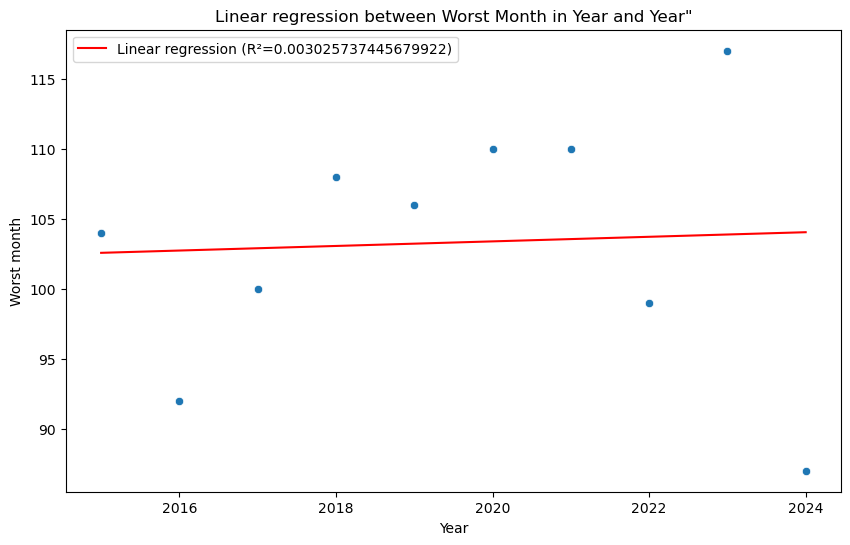

Result :
pente  : 0.16363636363636372
ordonnée à l'origine : -227.1636363636365
R² (coefficient de détermination) : 0.003025737445679922


In [207]:
from scipy.stats import linregress
wm_df=pd.DataFrame(worst_month_deaths.reset_index())

wm_df.rename(columns={0:"count"},inplace=True)
x=wm_df["year"]
y=wm_df["count"]


slope, intercept, r_value, p_value, std_err = linregress(x, y)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=x, y=y)
plt.plot(x, slope*x + intercept, color='red', label=f'Linear regression (R²={r_value**2})')
plt.title('Linear regression between Worst Month in Year and Year"')
plt.xlabel('Year')
plt.ylabel('Worst month')
plt.legend()
plt.show()

#les résultats de la régression
print("Result :")
print(f"pente  : {slope}")
print(f"ordonnée à l'origine : {intercept}")
print(f"R² (coefficient de détermination) : {r_value**2}")

##### Conclusion
It seem like there is no linear relationship between the peak death in some month every year

##### Distribution of Deaths by Month in the Most Fatal Year
We look at the distribution of fatal police shootings over months in the most fatal year identified. This pie chart gives a visual representation of when fatalities were most concentrated, aiding in temporal analysis of violence.

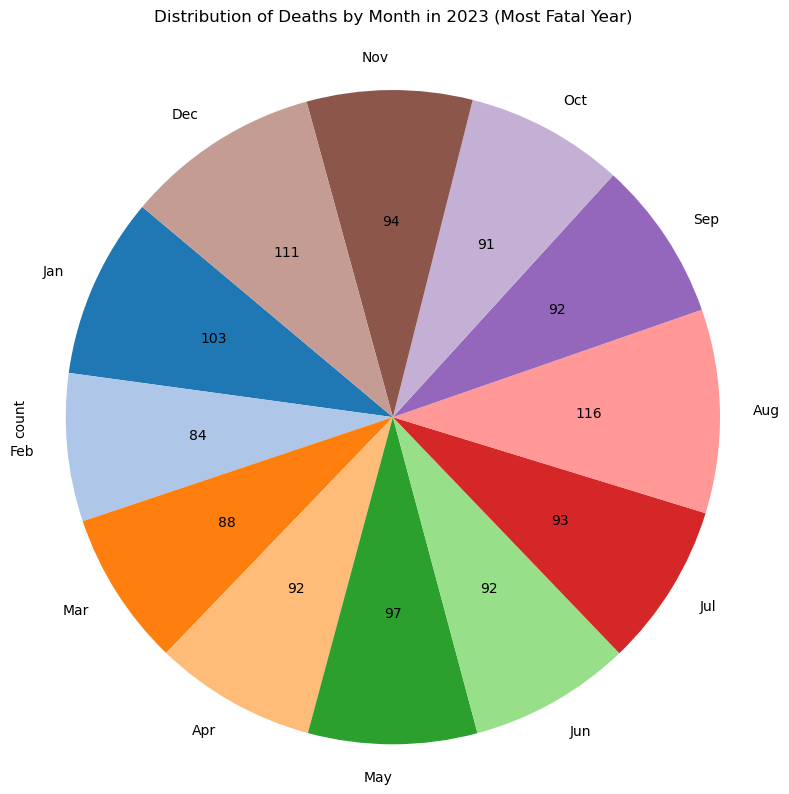

In [208]:


fatal_encounters_yearly_deaths = fedf.groupby(fedf['date'].dt.year).size()

worst_year = fatal_encounters_yearly_deaths.idxmax()

worst_year_data = fedf[fedf['date'].dt.year == worst_year]

worst_year_monthly_deaths = worst_year_data['date'].dt.month.value_counts().sort_index()

month_names = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
               7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
worst_year_monthly_deaths.index = worst_year_monthly_deaths.index.map(month_names)

def absolute_values(pct, all_values):
    absolute = int(pct/100.*np.sum(all_values))
    return "{:.0f}".format(absolute)

plt.figure(figsize=(8, 8))
worst_year_monthly_deaths.plot(kind='pie', autopct=lambda pct: absolute_values(pct, worst_year_monthly_deaths), startangle=140, colors=plt.cm.tab20.colors)
plt.title(f'Distribution of Deaths by Month in {worst_year} (Most Fatal Year)\n\n')
plt.axis('equal') 
plt.tight_layout()
plt.show()



## Analysis of Law Enforcement Data


### Police Deaths by Month (From 2007 Onwards)
Here, we analyze the police deaths by month starting from 2007. The intent is to highlight any trends or spikes in specific months or years, providing insights into potential external factors affecting these incidents.

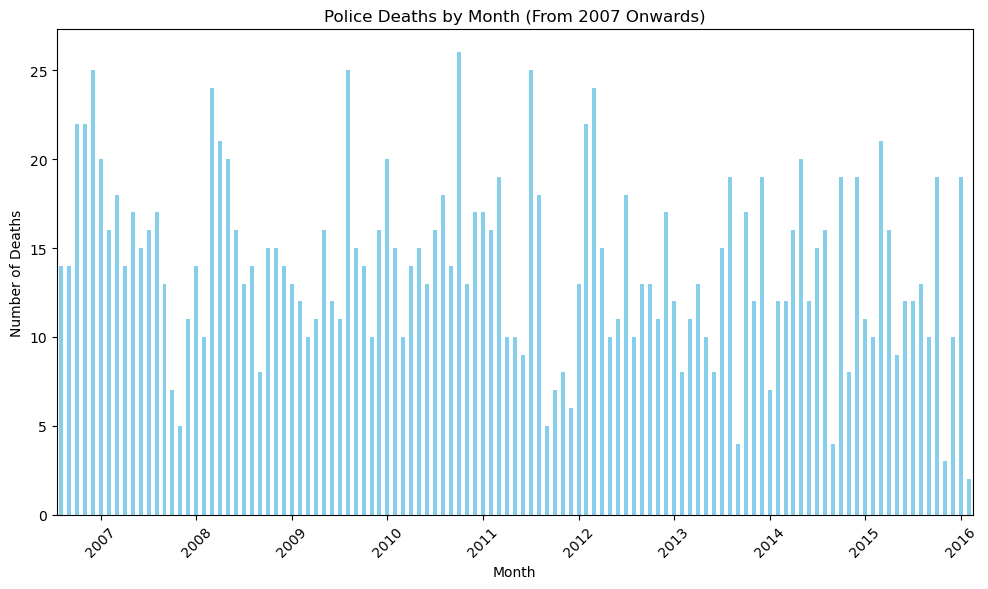

In [209]:
df = police_death_df[police_death_df['date'].dt.year >= 2007]

monthly_deaths = df.groupby(df['date'].dt.to_period('M'))['person'].count()

plt.figure(figsize=(10, 6))
monthly_deaths.plot(kind='bar', color='skyblue')
plt.title('Police Deaths by Month (From 2007 Onwards)')
plt.xlabel('Month')
plt.ylabel('Number of Deaths')

years = monthly_deaths.index.year.unique()
year_positions = [i for i, val in enumerate(monthly_deaths.index.year) if val != monthly_deaths.index.year[i - 1]]  
year_positions = [pos + 5 for pos in year_positions]  

plt.xticks(ticks=year_positions, labels=years, rotation=45)
plt.tight_layout()
plt.show()


### Most Fatal Month by Year for Police Deaths
This plot identifies which month each year had the highest number of police deaths. Analyzing this can help pinpoint operational or environmental factors contributing to higher risks during specific months.

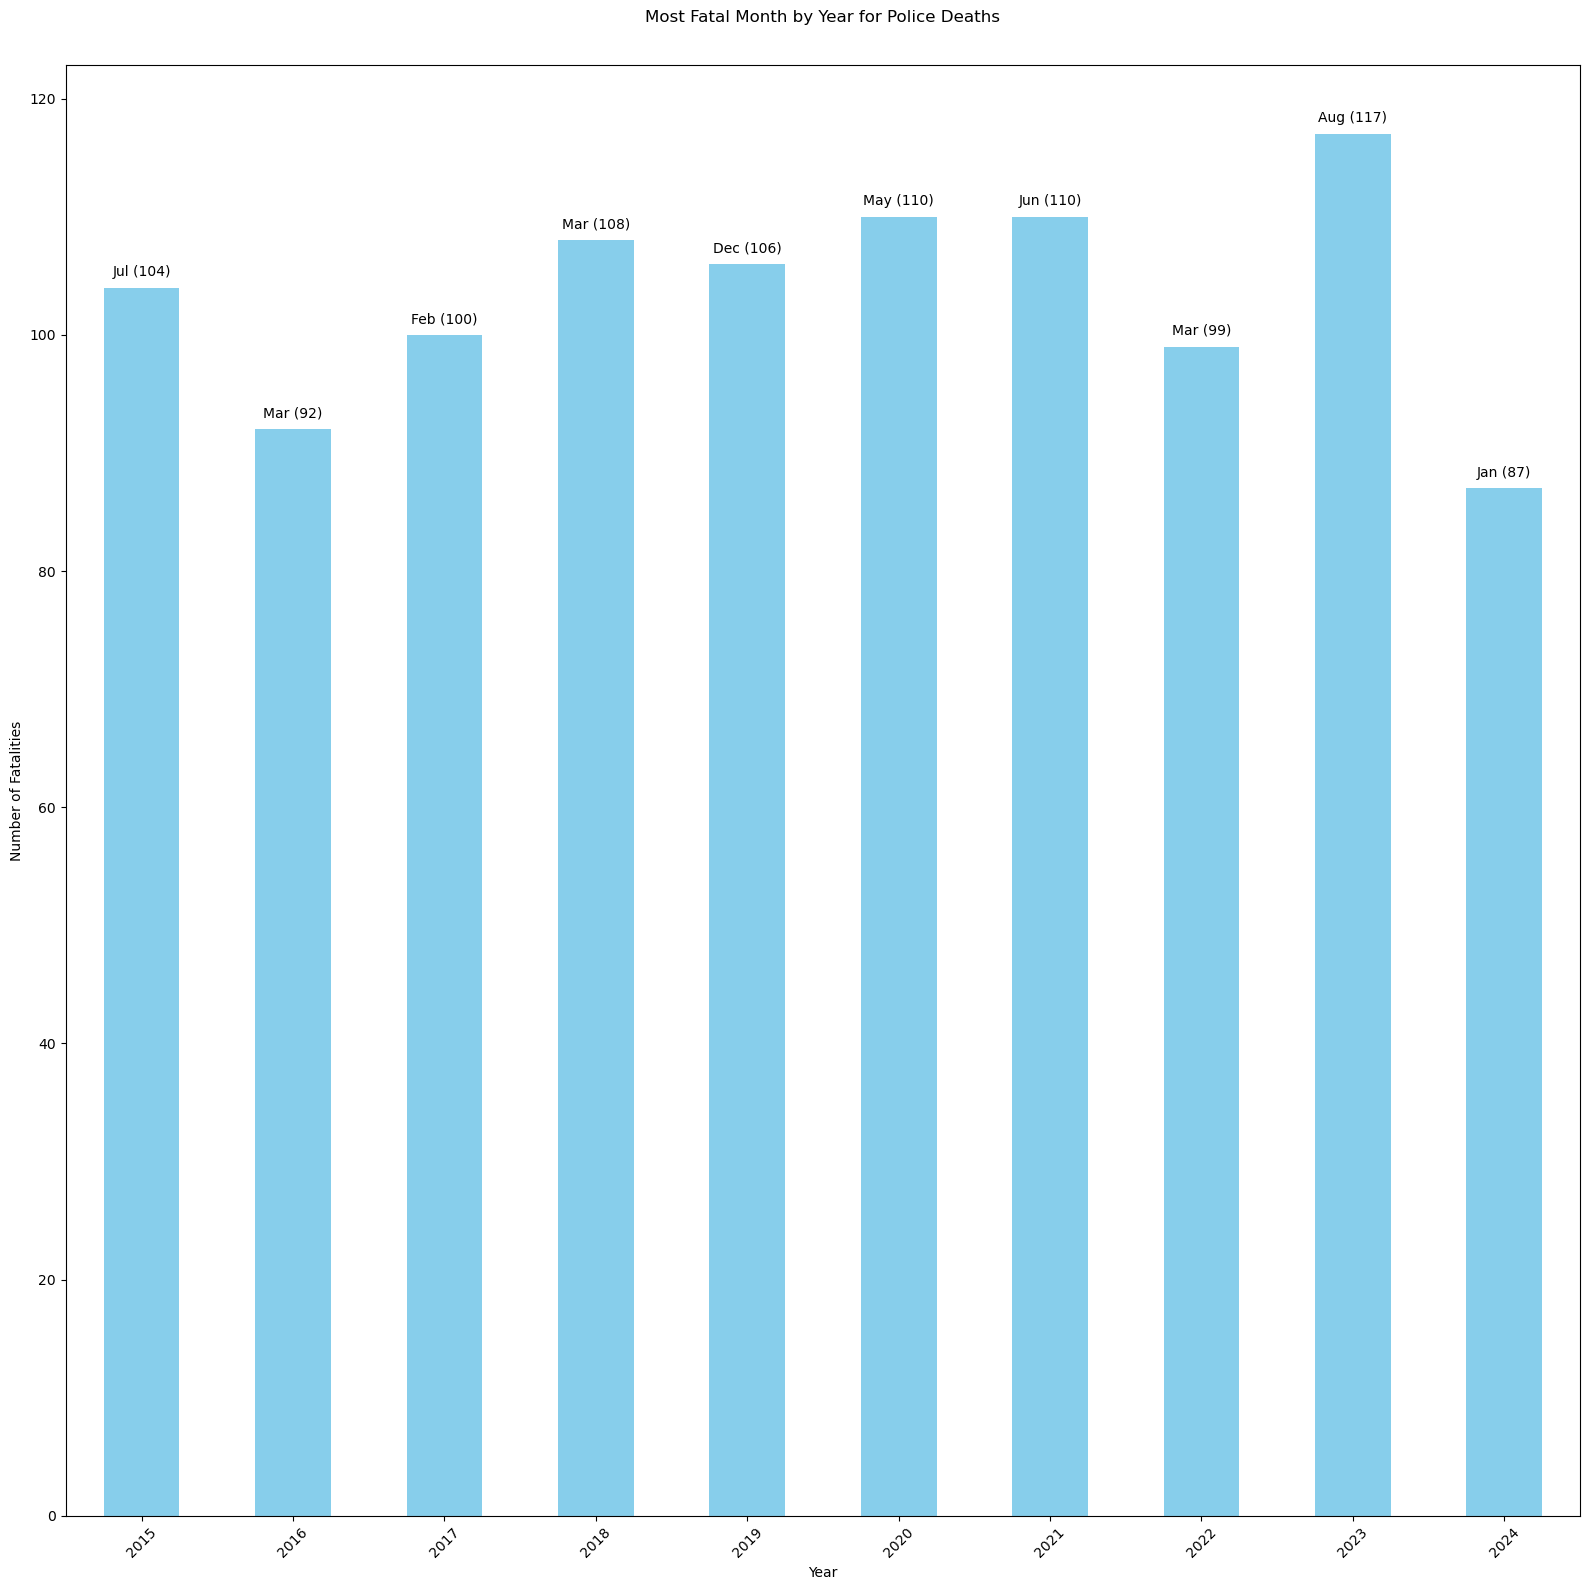

In [210]:


fedf['year'] = fedf['date'].dt.year
fedf['month'] = fedf['date'].dt.month

month_group = fedf.groupby(['year', 'month']).size()
worst_month_per_year = month_group.groupby('year').idxmax()
worst_month_deaths = month_group.loc[worst_month_per_year]

month_names = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
               7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

plot_data = pd.DataFrame({
    'Year': [idx[0] for idx in worst_month_deaths.index],
    'Month': [month_names[idx[1]] for idx in worst_month_deaths.index],
    'Deaths': worst_month_deaths.values
})

fig, ax = plt.subplots(figsize=(16, 16))
plot_data.set_index('Year').plot(kind='bar', y='Deaths', ax=ax, legend=False, color='skyblue')
plt.title('Most Fatal Month by Year for Police Deaths\n\n')
plt.ylabel('Number of Fatalities')
plt.xlabel('Year')

for i, (index, row) in enumerate(plot_data.iterrows()):
    ax.text(i, row['Deaths'] + 1, f"{row['Month']} ({row['Deaths']})", color='black', ha='center')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Distribution of Deaths by Month in the Worst Year for the Police
This analysis focuses on the year with the highest police deaths, breaking it down by month. It provides a clear picture of any particular time of year that may need further investigation or intervention.

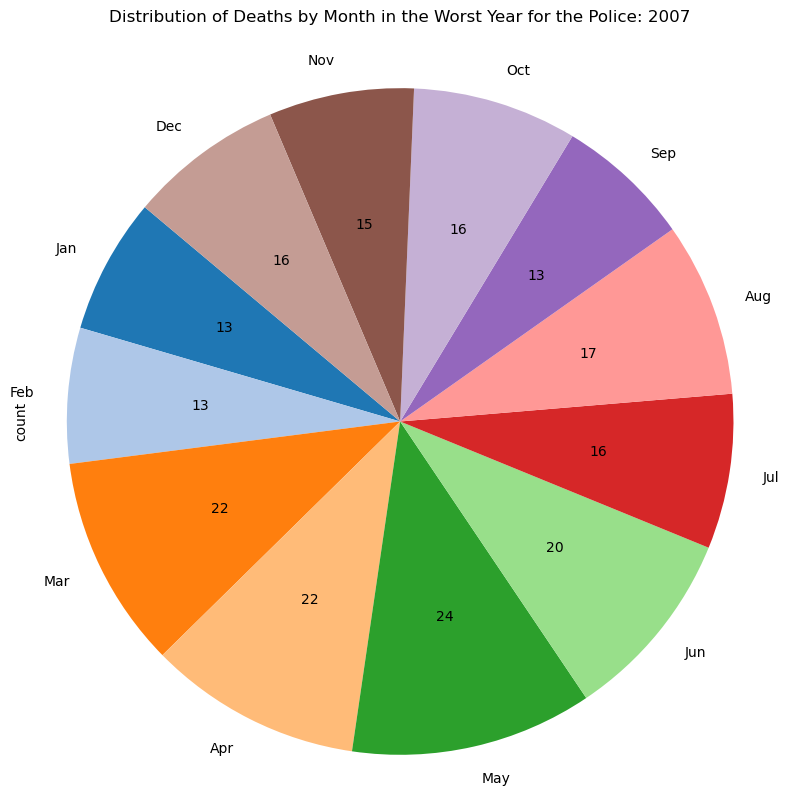

In [211]:
police_deaths_yearly_deaths = df.groupby(df['date'].dt.year).size()

worst_year_police = police_deaths_yearly_deaths.idxmax()

worst_year_police_data = df[df['date'].dt.year == worst_year_police]

worst_year_police_monthly_deaths = worst_year_police_data['date'].dt.month.value_counts().sort_index()

month_names = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
               7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
worst_year_police_monthly_deaths.index = worst_year_police_monthly_deaths.index.map(month_names)

def absolute_values(pct, all_values):
    absolute = int(pct/100.*np.sum(all_values))
    return "{:d}".format(absolute)

# Plot the pie chart
plt.figure(figsize=(8, 8))
worst_year_police_monthly_deaths.plot(kind='pie', autopct=lambda pct: absolute_values(pct, worst_year_police_monthly_deaths), startangle=140, colors=plt.cm.tab20.colors)
plt.title(f'Distribution of Deaths by Month in the Worst Year for the Police: {worst_year_police}\n\n')
plt.axis('equal') 
plt.tight_layout()
plt.show()


### Top 10 Most Involved Police Departments in Shootings since 2015
We rank police departments by their involvement in shootings to identify those with the highest numbers. This can guide further qualitative analysis into the practices and policies of these departments.

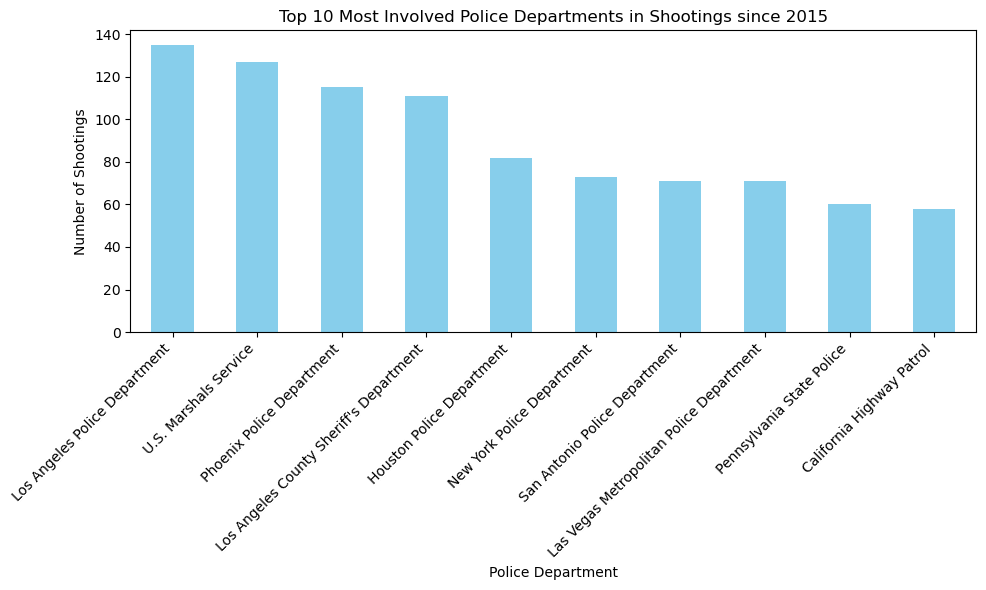

In [212]:
df_agency_ids = fedf['agency_ids'].str.split(';', expand=True).stack().reset_index(level=1, drop=True)
df_agency_ids.name = 'agency_id'
df_exploded = fedf.join(df_agency_ids)

df_exploded['agency_id'] = df_exploded['agency_id'].astype('int64')

df_merged = pd.merge(df_exploded, police_agencies_df, left_on='agency_id', right_on='id', how='left')

agency_counts = df_merged['name_y'].value_counts()

top_agencies = agency_counts.head(10)

plt.figure(figsize=(10, 6))
bar_plot = top_agencies.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Involved Police Departments in Shootings since 2015')
plt.xlabel('Police Department')
plt.ylabel('Number of Shootings')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

### Analysis of the Law Enforcers's Death starting from 2015
We want to get the number of dead law enforcers since 2015 and compare it to civilian deaths.




In [213]:
filtered_police_df = police_death_df[police_death_df['date'] >= '2015-01-02']
filtered_police_df.head(1)

,person,dept,eow,cause,cause_short,date,year,canine,dept_name,state
22567,Sergeant Sean Patrick Renfro,"Jefferson County Sheriff's Office, CO","EOW: Saturday, January 3, 2015",Cause of Death: Struck by vehicle,Struck by vehicle,2015-01-03,2015,False,Jefferson County Sheriff's Office,CO


#### Total Death Count

In [214]:
print(f"Number of deceased policemen from 2-01-2015 : {filtered_police_df.count().values[0]}")

Number of deceased policemen from 2-01-2015 : 233


#### Cause of Death

In [215]:
filtered_police_df.cause_short.value_counts()

cause_short
Gunfire                     70
Automobile accident         37
Heart attack                21
Heat exhaustion             19
Vehicular assault           16
Struck by vehicle           11
9/11 related illness         9
Vehicle pursuit              7
Motorcycle accident          6
Bomb                         6
Gunfire (Accidental)         5
Animal related               4
Accidental                   3
Assault                      3
Drowned                      3
Fire                         2
Stabbed                      2
Aircraft accident            2
Duty related illness         2
Weather/Natural disaster     1
Poisoned                     1
Fall                         1
Training accident            1
Asphyxiation                 1
Name: count, dtype: int64

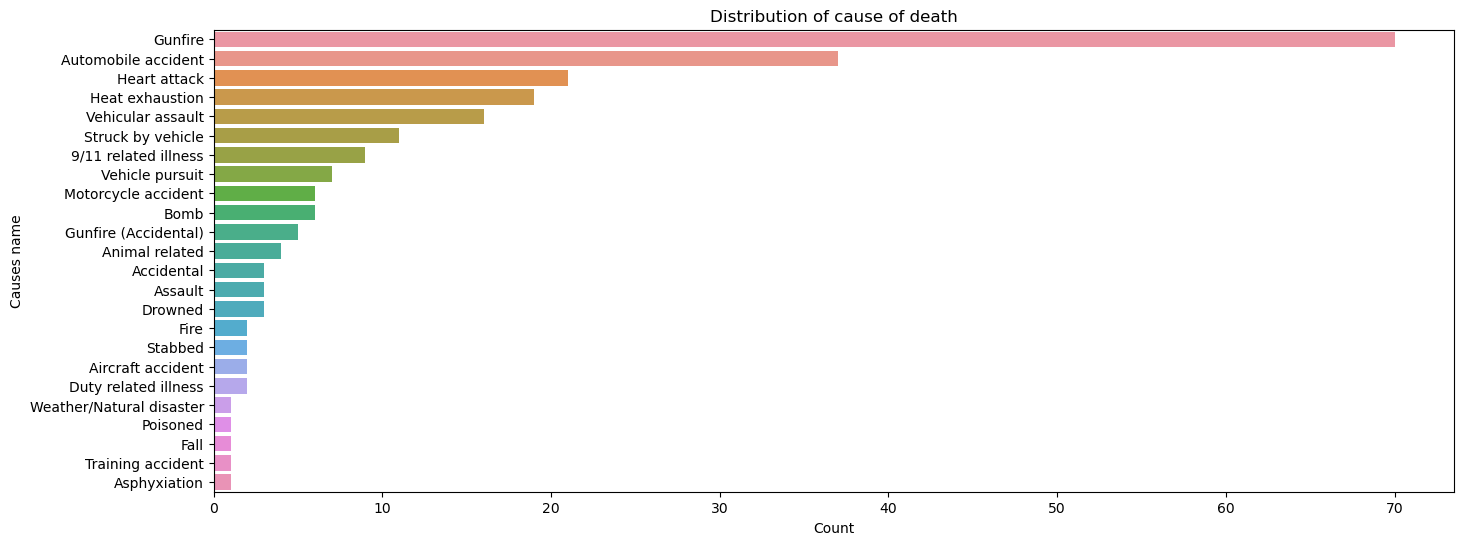

In [216]:
indice_list = filtered_police_df.cause_short.value_counts().keys()
plt.figure(figsize=(16, 6))
ax = sns.countplot(data=filtered_police_df, y='cause_short',order=indice_list)
ax.set_title('Distribution of cause of death')
ax.set_xlabel('Count')
ax.set_ylabel('Causes name')


plt.show()

- Conclusion
  - We can see that policemen death has several causes, we ll filter the data for only relevant death causes related to interaction with civilian 

#### Death Related to Interaction With Civilian

In [217]:

relevant_cause = ['Gunfire', 'Vehicular assault', 
       'Vehicle pursuit', 'Bomb',
       'Gunfire (Accidental)', 'Assault',  'Stabbed',  'Poisoned']
relevant_cause

['Gunfire',
 'Vehicular assault',
 'Vehicle pursuit',
 'Bomb',
 'Gunfire (Accidental)',
 'Assault',
 'Stabbed',
 'Poisoned']

In [218]:
filtered_with_relevant_df = filtered_police_df[filtered_police_df.cause_short.isin(relevant_cause)]
filtered_with_relevant_df.cause_short. value_counts()


cause_short
Gunfire                 70
Vehicular assault       16
Vehicle pursuit          7
Bomb                     6
Gunfire (Accidental)     5
Assault                  3
Stabbed                  2
Poisoned                 1
Name: count, dtype: int64

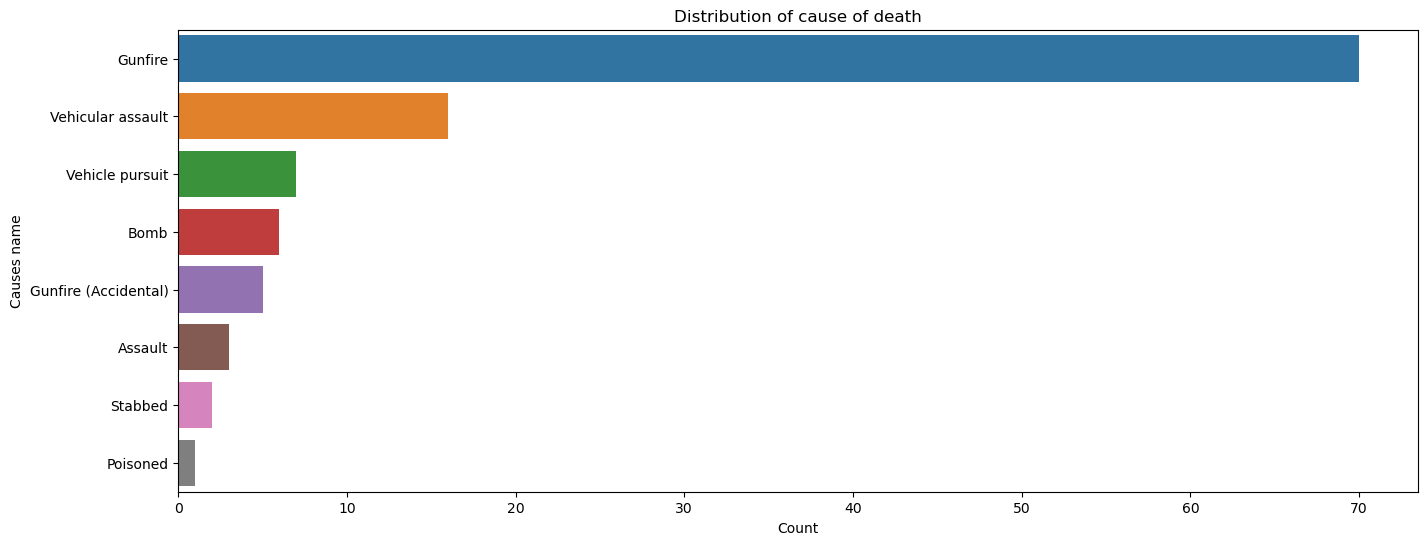

In [219]:
index_cause = filtered_with_relevant_df.cause_short. value_counts().keys()
index_cause
plt.figure(figsize=(16, 6))
ax = sns.countplot(data=filtered_with_relevant_df, y='cause_short',order=index_cause)
ax.set_title('Distribution of cause of death')
ax.set_xlabel('Count')
ax.set_ylabel('Causes name')


plt.show()

#### Total Death Count Based on Relevant Cause

In [220]:
print("Actual relevant death count ", filtered_with_relevant_df.count().iloc[0])

Actual relevant death count  110


### 5 most dangerous State for law enforcers

In [221]:
mdsfpdf= filtered_with_relevant_df.state.value_counts().head(5).reset_index()
print(mdsfpdf)

  state  count
0    TX     10
1    LA      9
2    US      8
3    CA      8
4    GA      6


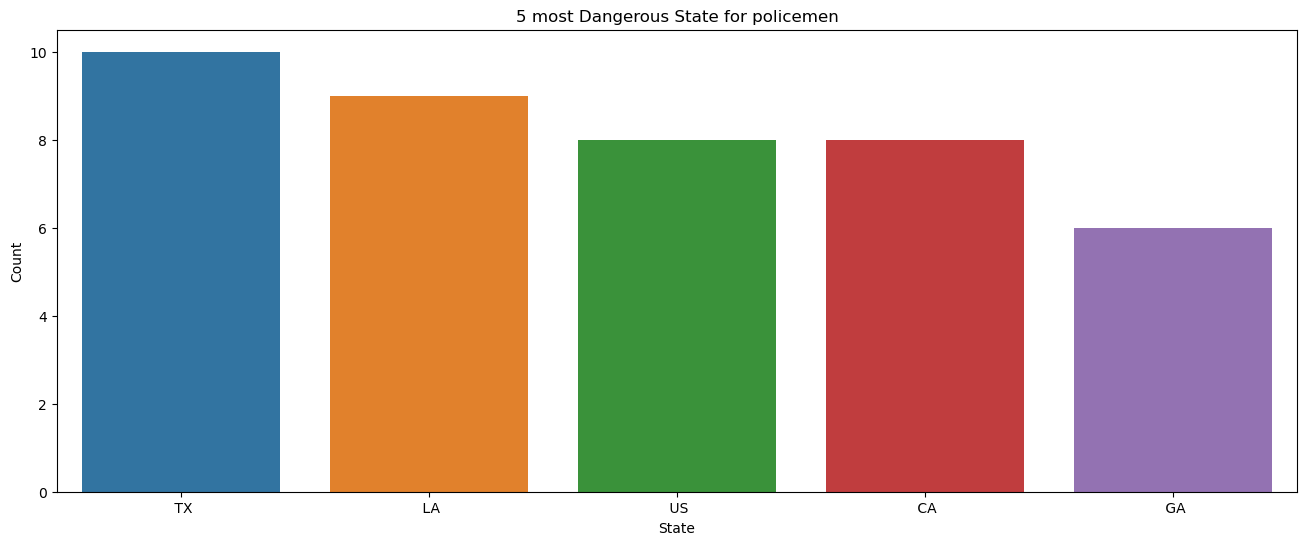

In [222]:
state_df = filtered_with_relevant_df[filtered_with_relevant_df.state.isin(mdsfpdf.state)]

plt.figure(figsize=(16, 6))
ax = sns.countplot(data=state_df, x="state",order=mdsfpdf.state)
ax.set_title('5 most Dangerous State for policemen' )
ax.set_xlabel('State')
ax.set_ylabel('Count')


plt.show()

### 5 least dangerous State for law enforcers

In [223]:
ldsfpdf= filtered_with_relevant_df.state.value_counts().tail(5).reset_index()
print(ldsfpdf)

  state  count
0    ID      1
1    TR      1
2    MO      1
3    WI      1
4    MA      1


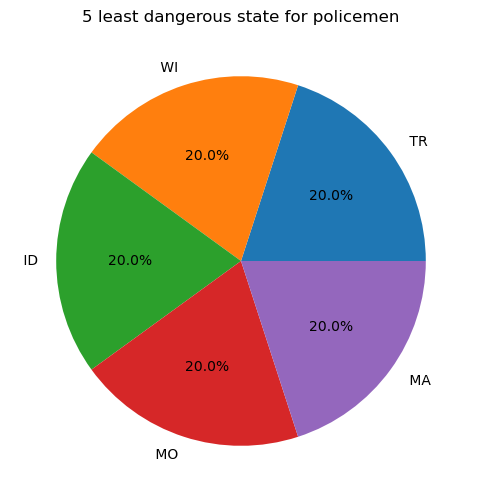

In [224]:
lstate_df = filtered_with_relevant_df[filtered_with_relevant_df.state.isin(ldsfpdf.state)]

plt.figure(figsize=(16, 6))
plt.pie(lstate_df.value_counts(), autopct="%1.1f%%",labels=lstate_df.state)
plt.title("5 least dangerous state for policemen")


plt.show()

### Proportion of Law enforcers Deaths Against Civilian from 2015 to 2016
For this analysis, we ll extract the last record date in police death data set and filter shooting data set accordinly 

In [225]:
police_death_sorted_date = np.sort( police_death_df.date)

first_date = police_death_sorted_date[0]
first_date

numpy.datetime64('1791-01-03T00:00:00.000000000')

In [226]:
last_date = police_death_sorted_date[-1]
print(last_date)

2016-07-03T00:00:00.000000000


- Extraction of civilian observation till last date

In [227]:

new_fedf = fedf[fedf.date<="2016-07-03"]
new_fedf.name.count()

1500

In [228]:
cpdf = np.array ( [
filtered_with_relevant_df.count().iloc[0], new_fedf.name.count()])
cpdf


array([ 110, 1500], dtype=int64)

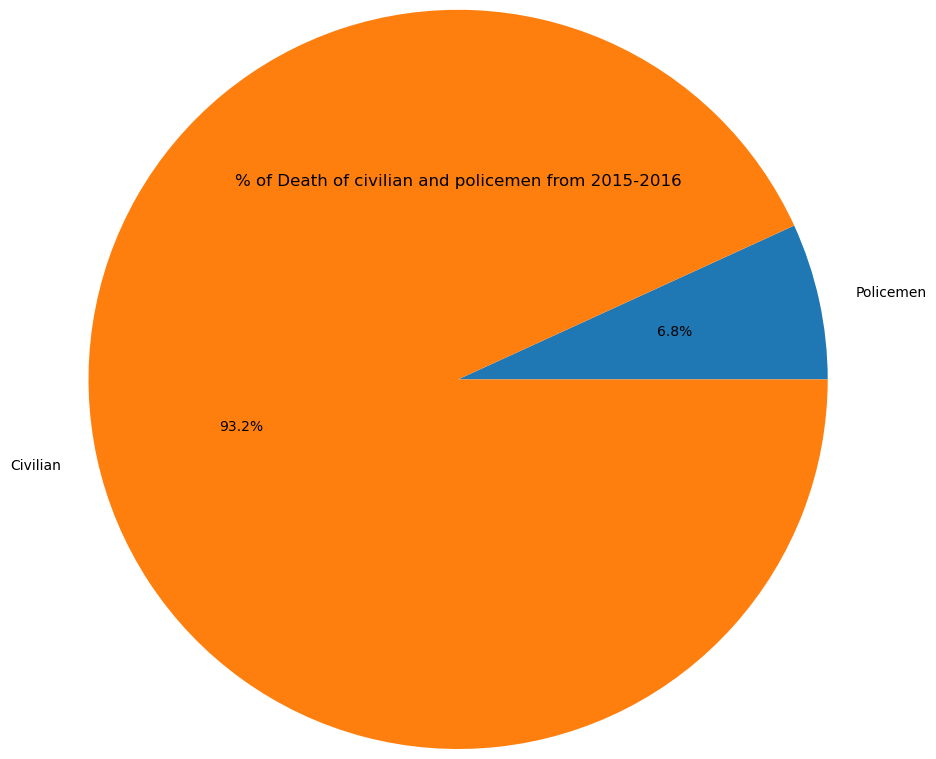

In [229]:
plt.pie(cpdf, autopct="%1.1f%%",labels=["Policemen","Civilian"],radius=2.5)
plt.title("% of Death of civilian and policemen from 2015-2016")
plt.show()

##### The risk for a civilian to be murdered by a cop is greater than a cop to be killed by a civilian

### Top Most Common First Names in Fatal Police Shootings
This section examines the most common first names among those killed in police shootings. While it may not provide direct insights into police behavior, it offers a unique sociological perspective on the data.

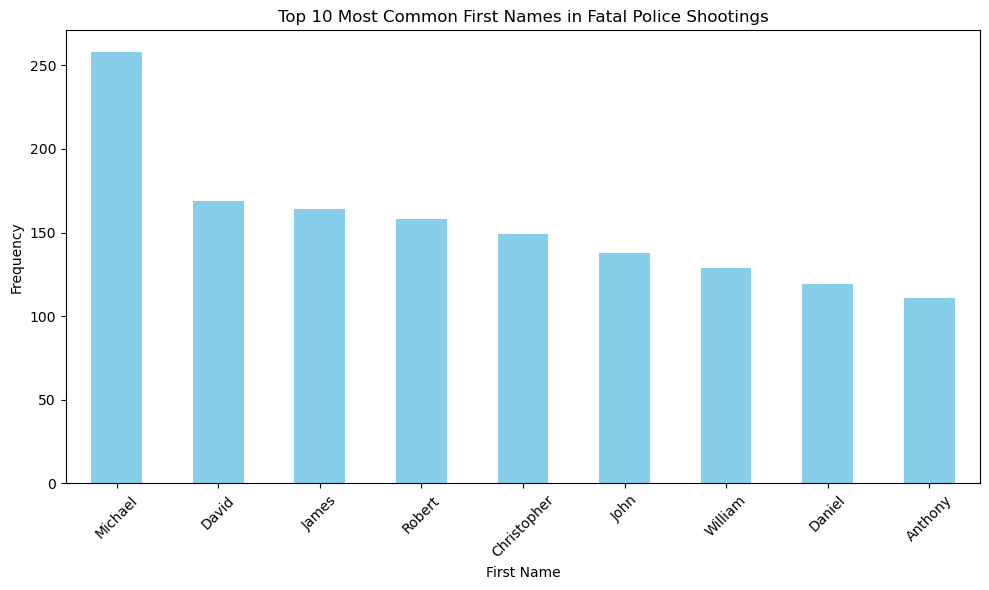

In [230]:
fedf['first_name'] = fedf['name'].str.split().str[0]

first_name_counts = fedf['first_name'].value_counts()

top_n = 10  
# We need to remove the unknown names by extracting data from index 1
top_first_names = first_name_counts.head(top_n).iloc[1:]
top_first_names

plt.figure(figsize=(10, 6))
top_first_names.plot(kind='bar', color='skyblue')
plt.title(f'Top {top_n} Most Common First Names in Fatal Police Shootings')
plt.xlabel('First Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Conclusion

The dataset related to the interaction between police and civilian death contains a lot of categorical data. In our analysis we had to explore all relevant information using statistic tools. We put focus on Gender, Age, Racial components and death count as they can give an overall view of the situation.  